In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
main = pd.read_csv("newtrain.csv")

In [3]:
main.shape

(307511, 904)

In [32]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = (df['prop_good']) * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) *df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    #return np.unique(df['IV'])
    return df

In [33]:
def woe_ordered_continuous(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = (df['prop_good']) * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) *df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    #return np.unique(df['IV'])
    return df

In [6]:
def cat_cont(df):
    columns = df.columns.values
    categorical_cols = df.select_dtypes(include=['object']).copy().columns.values
    numerical_cols = np.delete(columns,np.searchsorted(columns,categorical_cols))
    c=0
    length=df.shape[0]
    while length !=0:
        c +=1
        length = int(length/10)
    for cols in numerical_cols:
        
        #Getting all the categorical variables header from dataset
        if df[cols].value_counts().count() < max(math.floor(df.shape[0]/(10**(c-1))),15):
            categorical_cols = np.append(categorical_cols,cols)
            
        #Dropping all the categorical variables header names for getting numerical variables header names
    numerical_cols = df.drop(categorical_cols,axis=1).columns.values
    return numerical_cols,categorical_cols

In [7]:
main = main.drop("Unnamed: 0",axis=1)

In [8]:
pd.set_option('display.max_rows',1000)
missing_perc = pd.Series(np.sum(pd.isnull(main))*100/main.shape[0],index=main.columns)

In [9]:
missing_perc = missing_perc.to_frame()

In [10]:
missing_perc = missing_perc.reset_index()
missing_perc.columns = ['Name','perc']
type(missing_perc)

pandas.core.frame.DataFrame

In [11]:
num,cat = cat_cont(main)

In [12]:
coln = missing_perc.Name.loc[missing_perc.perc < 20]

In [13]:
for i in coln:
    if i in cat:
        main[i] = main[i].fillna(0)

In [14]:
for i in coln:
    if i in num:
        main[i] = main[i].fillna(np.nanmedian(main[i]))

In [15]:
pd.DataFrame(np.sum(pd.isnull(main))*100/main.shape[0])

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.000000


In [16]:
di = {}
dumm = main
for i in num:
    if((i != 'SK_ID_CURR') & (i !='TARGET')):
        dumm['fac'] = pd.qcut(dumm[i],10,duplicates='drop')
        a = woe_ordered_continuous(dumm,'fac',dumm["TARGET"])
    #print(a)
        if(a>0.1):
          di[i] = a
di

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'DAYS_EMPLOYED': array([0.10126294]),
 'EXT_SOURCE_1': array([0.34644538]),
 'EXT_SOURCE_2': array([0.30631346]),
 'EXT_SOURCE_3': array([0.31383336]),
 'bureau_DAYS_CREDIT_mean': array([0.11505685]),
 'bureau_DAYS_CREDIT_UPDATE_mean': array([inf]),
 'bureau_DAYS_CREDIT_UPDATE_min': array([inf]),
 'bureau_DAYS_CREDIT_UPDATE_sum': array([inf]),
 'credit_AMT_BALANCE_mean': array([0.13944667]),
 'credit_AMT_BALANCE_min': array([0.10344099]),
 'credit_AMT_DRAWINGS_ATM_CURRENT_count': array([0.18708513]),
 'credit_AMT_DRAWINGS_ATM_CURRENT_mean': array([0.13542865]),
 'credit_AMT_DRAWINGS_CURRENT_mean': array([0.15637082]),
 'credit_AMT_DRAWINGS_OTHER_CURRENT_count': array([0.18708513]),
 'credit_AMT_DRAWINGS_POS_CURRENT_count': array([0.18708513]),
 'credit_AMT_INST_MIN_REGULARITY_mean': array([0.10399415]),
 'credit_AMT_PAYMENT_CURRENT_count': array([0.18434871]),
 'credit_AMT_PAYMENT_CURRENT_sum': array([0.12016498]),
 'credit_AMT_RECEIVABLE_PRINCIPAL_mean': array([0.13663059]),
 'credit

In [17]:
len(di)

29

In [18]:
for i in cat:
    if((i != 'SK_ID_CURR') & (i !='TARGET')):
        a = woe_discrete(dumm,i,dumm["TARGET"])
    #print(a)
        if(a>0.1):
          di[i] = a
di

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


{'DAYS_EMPLOYED': array([0.10126294]),
 'EXT_SOURCE_1': array([0.34644538]),
 'EXT_SOURCE_2': array([0.30631346]),
 'EXT_SOURCE_3': array([0.31383336]),
 'bureau_DAYS_CREDIT_mean': array([0.11505685]),
 'bureau_DAYS_CREDIT_UPDATE_mean': array([inf]),
 'bureau_DAYS_CREDIT_UPDATE_min': array([inf]),
 'bureau_DAYS_CREDIT_UPDATE_sum': array([inf]),
 'credit_AMT_BALANCE_mean': array([0.13944667]),
 'credit_AMT_BALANCE_min': array([0.10344099]),
 'credit_AMT_DRAWINGS_ATM_CURRENT_count': array([0.18708513]),
 'credit_AMT_DRAWINGS_ATM_CURRENT_mean': array([0.13542865]),
 'credit_AMT_DRAWINGS_CURRENT_mean': array([0.15637082]),
 'credit_AMT_DRAWINGS_OTHER_CURRENT_count': array([0.18708513]),
 'credit_AMT_DRAWINGS_POS_CURRENT_count': array([0.18708513]),
 'credit_AMT_INST_MIN_REGULARITY_mean': array([0.10399415]),
 'credit_AMT_PAYMENT_CURRENT_count': array([0.18434871]),
 'credit_AMT_PAYMENT_CURRENT_sum': array([0.12016498]),
 'credit_AMT_RECEIVABLE_PRINCIPAL_mean': array([0.13663059]),
 'credit

In [19]:
len(di)

157

In [20]:
cols = ['SK_ID_CURR']
cols = cols+list(di.keys())
cols = cols+['TARGET']

In [21]:
imp = main.loc[:,cols]

In [22]:
cols

['SK_ID_CURR',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'bureau_DAYS_CREDIT_mean',
 'bureau_DAYS_CREDIT_UPDATE_mean',
 'bureau_DAYS_CREDIT_UPDATE_min',
 'bureau_DAYS_CREDIT_UPDATE_sum',
 'credit_AMT_BALANCE_mean',
 'credit_AMT_BALANCE_min',
 'credit_AMT_DRAWINGS_ATM_CURRENT_count',
 'credit_AMT_DRAWINGS_ATM_CURRENT_mean',
 'credit_AMT_DRAWINGS_CURRENT_mean',
 'credit_AMT_DRAWINGS_OTHER_CURRENT_count',
 'credit_AMT_DRAWINGS_POS_CURRENT_count',
 'credit_AMT_INST_MIN_REGULARITY_mean',
 'credit_AMT_PAYMENT_CURRENT_count',
 'credit_AMT_PAYMENT_CURRENT_sum',
 'credit_AMT_RECEIVABLE_PRINCIPAL_mean',
 'credit_AMT_RECIVABLE_mean',
 'credit_AMT_TOTAL_RECEIVABLE_mean',
 'credit_CNT_DRAWINGS_ATM_CURRENT_count',
 'credit_CNT_DRAWINGS_ATM_CURRENT_mean',
 'credit_CNT_DRAWINGS_CURRENT_mean',
 'credit_CNT_DRAWINGS_CURRENT_max',
 'credit_CNT_DRAWINGS_CURRENT_sum',
 'credit_CNT_DRAWINGS_OTHER_CURRENT_count',
 'credit_CNT_DRAWINGS_POS_CURRENT_count',
 'credit_CNT_DRAWINGS_POS_

In [23]:
imp.head()

,SK_ID_CURR,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,credit_AMT_BALANCE_mean,...,pos_cash_SK_DPD_DEF_min,pos_cash_NAME_CONTRACT_STATUS_Amortized debt_count,pos_cash_NAME_CONTRACT_STATUS_Amortized debt_count_norm,pos_cash_NAME_CONTRACT_STATUS_Approved_count,pos_cash_NAME_CONTRACT_STATUS_Canceled_count,pos_cash_NAME_CONTRACT_STATUS_Canceled_count_norm,pos_cash_NAME_CONTRACT_STATUS_Returned to the store_count,pos_cash_NAME_CONTRACT_STATUS_XNA_count,pos_cash_NAME_CONTRACT_STATUS_XNA_count_norm,TARGET
0,100002,-637,0.0830,0.2630,0.1394,-874.0,-500.0,-1185.0,-3999.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,100003,-1188,0.3113,0.6220,0.5350,-1401.0,-816.0,-2132.0,-3264.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,100004,-225,NaN,0.5560,0.7295,-867.0,-532.0,-682.0,-1064.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,100006,-3039,NaN,0.6504,0.5350,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,-3038,NaN,0.3228,0.5350,-1149.0,-783.0,-783.0,-783.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [24]:
pd.set_option('display.max_rows',500)
pd.DataFrame(np.sum(pd.isnull(imp))*100/imp.shape[0])

,0
SK_ID_CURR,0.000000
DAYS_EMPLOYED,0.000000
EXT_SOURCE_1,56.381073
EXT_SOURCE_2,0.000000
EXT_SOURCE_3,0.000000
bureau_DAYS_CREDIT_mean,0.000000
bureau_DAYS_CREDIT_UPDATE_mean,0.000000
bureau_DAYS_CREDIT_UPDATE_min,0.000000
bureau_DAYS_CREDIT_UPDATE_sum,0.000000
credit_AMT_BALANCE_mean,71.739222


In [25]:
def plot_by_woe(df_woe, rotation_of_x_axis_labels = 0):
    x = np.array(df_woe.iloc[:, 0].apply(str))
    y = df_woe['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color ='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [26]:
imp.columns

Index(['SK_ID_CURR', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'bureau_DAYS_CREDIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'bureau_DAYS_CREDIT_UPDATE_min',
       'bureau_DAYS_CREDIT_UPDATE_sum', 'credit_AMT_BALANCE_mean',
       ...
       'pos_cash_SK_DPD_DEF_min',
       'pos_cash_NAME_CONTRACT_STATUS_Amortized debt_count',
       'pos_cash_NAME_CONTRACT_STATUS_Amortized debt_count_norm',
       'pos_cash_NAME_CONTRACT_STATUS_Approved_count',
       'pos_cash_NAME_CONTRACT_STATUS_Canceled_count',
       'pos_cash_NAME_CONTRACT_STATUS_Canceled_count_norm',
       'pos_cash_NAME_CONTRACT_STATUS_Returned to the store_count',
       'pos_cash_NAME_CONTRACT_STATUS_XNA_count',
       'pos_cash_NAME_CONTRACT_STATUS_XNA_count_norm', 'TARGET'],
      dtype='object', length=159)

In [27]:
cols_n = cols[:79]
df_train = imp.loc[:,cols_n]
df_target = imp.TARGET

In [28]:
df_train.columns

Index(['SK_ID_CURR', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'bureau_DAYS_CREDIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'bureau_DAYS_CREDIT_UPDATE_min',
       'bureau_DAYS_CREDIT_UPDATE_sum', 'credit_AMT_BALANCE_mean',
       'credit_AMT_BALANCE_min', 'credit_AMT_DRAWINGS_ATM_CURRENT_count',
       'credit_AMT_DRAWINGS_ATM_CURRENT_mean',
       'credit_AMT_DRAWINGS_CURRENT_mean',
       'credit_AMT_DRAWINGS_OTHER_CURRENT_count',
       'credit_AMT_DRAWINGS_POS_CURRENT_count',
       'credit_AMT_INST_MIN_REGULARITY_mean',
       'credit_AMT_PAYMENT_CURRENT_count', 'credit_AMT_PAYMENT_CURRENT_sum',
       'credit_AMT_RECEIVABLE_PRINCIPAL_mean', 'credit_AMT_RECIVABLE_mean',
       'credit_AMT_TOTAL_RECEIVABLE_mean',
       'credit_CNT_DRAWINGS_ATM_CURRENT_count',
       'credit_CNT_DRAWINGS_ATM_CURRENT_mean',
       'credit_CNT_DRAWINGS_CURRENT_mean', 'credit_CNT_DRAWINGS_CURRENT_max',
       'credit_CNT_DRAWINGS_CURRENT_sum',
       'credit_CNT_D

In [29]:
df_temp = df_train.copy()

In [30]:
numerical,categorical = cat_cont(df_train)

In [31]:
numerical

array(['SK_ID_CURR', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'bureau_DAYS_CREDIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'bureau_DAYS_CREDIT_UPDATE_min',
       'bureau_DAYS_CREDIT_UPDATE_sum', 'credit_AMT_BALANCE_mean',
       'credit_AMT_BALANCE_min', 'credit_AMT_DRAWINGS_ATM_CURRENT_count',
       'credit_AMT_DRAWINGS_ATM_CURRENT_mean',
       'credit_AMT_DRAWINGS_CURRENT_mean',
       'credit_AMT_DRAWINGS_OTHER_CURRENT_count',
       'credit_AMT_DRAWINGS_POS_CURRENT_count',
       'credit_AMT_INST_MIN_REGULARITY_mean',
       'credit_AMT_PAYMENT_CURRENT_count',
       'credit_AMT_PAYMENT_CURRENT_sum',
       'credit_AMT_RECEIVABLE_PRINCIPAL_mean',
       'credit_AMT_RECIVABLE_mean', 'credit_AMT_TOTAL_RECEIVABLE_mean',
       'credit_CNT_DRAWINGS_ATM_CURRENT_count',
       'credit_CNT_DRAWINGS_ATM_CURRENT_mean',
       'credit_CNT_DRAWINGS_CURRENT_mean',
       'credit_CNT_DRAWINGS_CURRENT_max',
       'credit_CNT_DRAWINGS_CURRENT_sum',
      

In [34]:
df_temp["DAYS_EMPLOYED_f"] = pd.qcut(imp["DAYS_EMPLOYED"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"DAYS_EMPLOYED_f",df_target)

In [35]:
df_temp["DAYS_EMPLOYED_f"]

0              (-822.0, -458.0]
1             (-1213.0, -822.0]
2              (-458.0, -144.0]
3            (-3231.0, -2362.0]
4            (-3231.0, -2362.0]
                  ...          
307506         (-458.0, -144.0]
307507       (-144.0, 365243.0]
307508    (-17912.001, -4881.0]
307509       (-4881.0, -3231.0]
307510       (-1695.0, -1213.0]
Name: DAYS_EMPLOYED_f, Length: 307511, dtype: category
Categories (9, interval[float64]): [(-17912.001, -4881.0] < (-4881.0, -3231.0] < (-3231.0, -2362.0] < (-2362.0, -1695.0] ... (-1213.0, -822.0] < (-822.0, -458.0] < (-458.0, -144.0] < (-144.0, 365243.0]]

In [36]:
woe_data

,DAYS_EMPLOYED_f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-17912.001, -4881.0]",30754,0.047604,0.100009,1464.0,29290.0,0.058973,0.103613,-0.563588,NaN,NaN,0.101263
1,"(-4881.0, -3231.0]",30762,0.059912,0.100035,1843.0,28919.0,0.074240,0.102301,-0.320619,0.012308,0.242970,0.101263
2,"(-3231.0, -2362.0]",30766,0.071865,0.100048,2211.0,28555.0,0.089063,0.101013,-0.125902,0.011953,0.194717,0.101263
3,"(-2362.0, -1695.0]",30740,0.082824,0.099964,2546.0,28194.0,0.102558,0.099736,0.027900,0.010959,0.153801,0.101263
4,"(-1695.0, -1213.0]",30800,0.096494,0.100159,2972.0,27828.0,0.119718,0.098441,0.195678,0.013670,0.167778,0.101263
5,"(-1213.0, -822.0]",30690,0.104888,0.099801,3219.0,27471.0,0.129668,0.097178,0.288425,0.008394,0.092747,0.101263
6,"(-822.0, -458.0]",30771,0.112931,0.100065,3475.0,27296.0,0.139980,0.096559,0.371340,0.008043,0.082914,0.101263
7,"(-458.0, -144.0]",30803,0.112814,0.100169,3475.0,27328.0,0.139980,0.096673,0.370168,0.000117,0.001172,0.101263
8,"(-144.0, 365243.0]",61425,0.058934,0.199749,3620.0,57805.0,0.145821,0.204485,-0.338116,0.053880,0.708284,0.101263


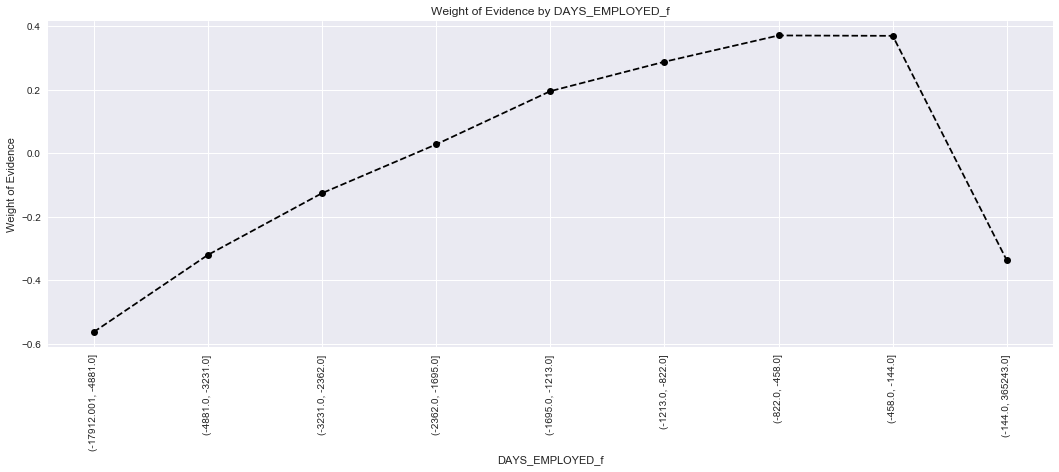

In [37]:
plot_by_woe(woe_data,90)

In [38]:
df_train["DAYS_EMPLOYED:<-3231.0"] = np.where(df_train["DAYS_EMPLOYED"] <= -3231.0,1,0)
df_train["DAYS_EMPLOYED:-3231.0--2362.0"] = np.where((df_train["DAYS_EMPLOYED"]>-3231.0) & (df_train["DAYS_EMPLOYED"] <= -2362.0),1,0)
df_train["DAYS_EMPLOYED:-2362.0--822.0"] = np.where((df_train["DAYS_EMPLOYED"]>-2362.0) & (df_train["DAYS_EMPLOYED"] <= -822.0),1,0)
df_train["DAYS_EMPLOYED:-822.0--144.0"] = np.where((df_train["DAYS_EMPLOYED"]>-822.0) & (df_train["DAYS_EMPLOYED"] <= -144.0),1,0)
df_train["DAYS_EMPLOYED:>-144.0"] = np.where(df_train["DAYS_EMPLOYED"] > -144.0,1,0)

In [39]:
#EXT_SOURCE_1
df_temp["EXT_SOURCE_1_f"] = pd.qcut(df_temp["EXT_SOURCE_1"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"EXT_SOURCE_1_f",df_target)

In [40]:
woe_data

,EXT_SOURCE_1_f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.013600000000000001, 0.212]",13425,0.175642,0.100087,2358.0,11067.0,0.234534,0.089193,0.966794,NaN,NaN,0.346445
1,"(0.212, 0.296]",13403,0.115870,0.099923,1553.0,11850.0,0.154466,0.095504,0.480809,0.059773,0.485985,0.346445
2,"(0.296, 0.369]",13469,0.090578,0.100415,1220.0,12249.0,0.121345,0.098719,0.206354,0.025291,0.274454,0.346445
3,"(0.369, 0.438]",13366,0.084094,0.099647,1124.0,12242.0,0.111796,0.098663,0.124969,0.006484,0.081385,0.346445
4,"(0.438, 0.506]",13421,0.066985,0.100057,899.0,12522.0,0.089417,0.100920,-0.121011,0.017109,0.245980,0.346445
5,"(0.506, 0.573]",13460,0.060030,0.100348,808.0,12652.0,0.080366,0.101967,-0.238061,0.006955,0.117049,0.346445
6,"(0.573, 0.641]",13439,0.051566,0.100192,693.0,12746.0,0.068928,0.102725,-0.398995,0.008463,0.160934,0.346445
7,"(0.641, 0.71]",13349,0.043824,0.099521,585.0,12764.0,0.058186,0.102870,-0.569824,0.007743,0.170829,0.346445
8,"(0.71, 0.787]",13416,0.035033,0.100020,470.0,12946.0,0.046748,0.104337,-0.802862,0.008791,0.233037,0.346445
9,"(0.787, 0.963]",13385,0.025700,0.099789,344.0,13041.0,0.034215,0.105102,-1.122264,0.009332,0.319402,0.346445


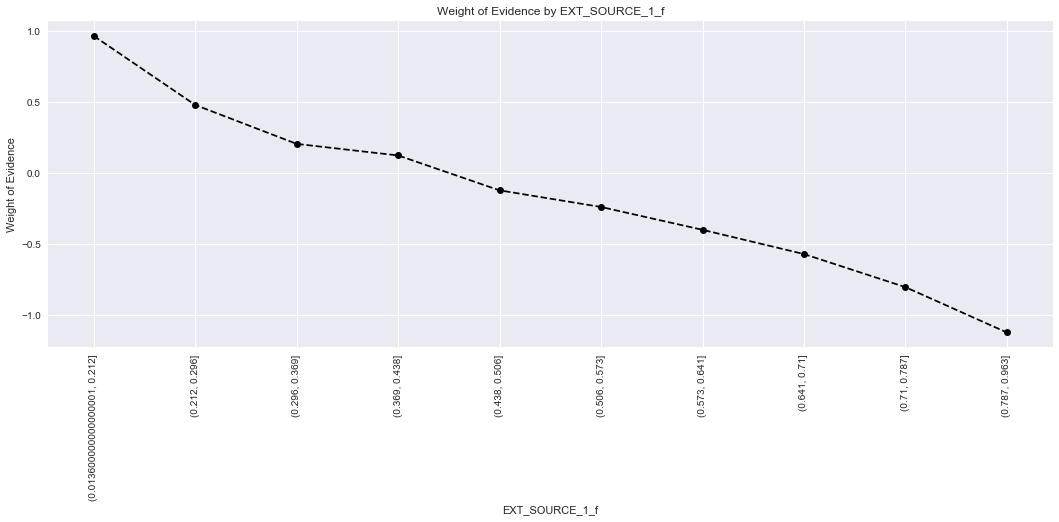

In [41]:
plot_by_woe(woe_data,90)

In [42]:
df_train["EXT_SOURCE_1:missing"] = np.where(df_train["EXT_SOURCE_1"].isnull(),1,0)
df_train["EXT_SOURCE_1:<=0.212"] = np.where(df_train["EXT_SOURCE_1"] <=0.212,1,0)
df_train["EXT_SOURCE_1:0.212-0.438"] = np.where((df_train["EXT_SOURCE_1"]>0.212) & (df_train["EXT_SOURCE_1"]<=0.438),1,0)
df_train["EXT_SOURCE_1:0.438-0.641"] = np.where((df_train["EXT_SOURCE_1"]>0.438) & (df_train["EXT_SOURCE_1"]<=0.641),1,0)
df_train["EXT_SOURCE_1:>0.641"] = np.where(df_train["EXT_SOURCE_1"]>0.641,1,0)

In [43]:
#EXT_SOURCE_2
df_temp["EXT_SOURCE_2_f"] = pd.qcut(df_temp["EXT_SOURCE_2"], 10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"EXT_SOURCE_2_f",df_target)

In [44]:
woe_data

,EXT_SOURCE_2_f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.00099994, 0.216]",30766,0.183352,0.100048,5641.0,25125.0,0.227231,0.088880,0.938684,NaN,NaN,0.306313
1,"(0.216, 0.34]",30755,0.120761,0.100013,3714.0,27041.0,0.149607,0.095657,0.447241,0.062591,0.491443,0.306313
2,"(0.34, 0.441]",30812,0.099507,0.100198,3066.0,27746.0,0.123505,0.098151,0.229768,0.021254,0.217473,0.306313
3,"(0.441, 0.513]",30797,0.083157,0.100149,2561.0,28236.0,0.103162,0.099885,0.032286,0.016349,0.197482,0.306313
4,"(0.513, 0.566]",31098,0.074474,0.101128,2316.0,28782.0,0.093293,0.101816,-0.087423,0.008683,0.119709,0.306313
5,"(0.566, 0.608]",30423,0.066496,0.098933,2023.0,28400.0,0.081490,0.100465,-0.209322,0.007978,0.121899,0.306313
6,"(0.608, 0.646]",30697,0.058540,0.099824,1797.0,28900.0,0.072387,0.102234,-0.345237,0.007956,0.135915,0.306313
7,"(0.646, 0.682]",31073,0.048756,0.101047,1515.0,29558.0,0.061027,0.104561,-0.538453,0.009784,0.193216,0.306313
8,"(0.682, 0.722]",30656,0.042080,0.099691,1290.0,29366.0,0.051964,0.103882,-0.692710,0.006676,0.154256,0.306313
9,"(0.722, 0.855]",30434,0.029638,0.098969,902.0,29532.0,0.036334,0.104469,-1.056130,0.012442,0.363420,0.306313


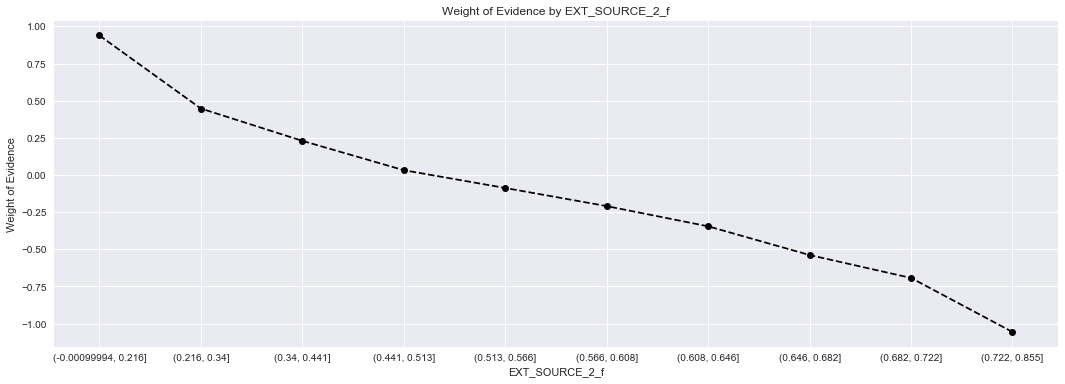

In [45]:
plot_by_woe(woe_data)

In [46]:
df_train['EXT_SOURCE_2:<=0.216'] = np.where(df_train["EXT_SOURCE_2"] <= 0.216,1,0)
df_train["EXT_SOURCE_2:0.216-0.513"] = np.where((df_train["EXT_SOURCE_2"] > 0.216) & (df_train["EXT_SOURCE_2"] <= 0.513),1,0)
df_train["EXT_SOURCE_2:0.513-0.566"] = np.where((df_train["EXT_SOURCE_2"] > 0.513) & (df_train["EXT_SOURCE_2"] <= 0.566),1,0)
df_train["EXT_SOURCE_2:>0.566"] = np.where(df_train["EXT_SOURCE_2"] > 0.566,1,0)

In [47]:
#EXT_SOURCE_3
df_temp["EXT_SOURCE_3:f"] = pd.qcut(df_temp["EXT_SOURCE_3"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"EXT_SOURCE_3:f",df_target)

In [48]:
woe_data

,EXT_SOURCE_3:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.000473, 0.257]",30852,0.188772,0.100328,5824.0,25028.0,0.234602,0.088536,0.974478,NaN,NaN,0.313833
1,"(0.257, 0.371]",31141,0.112713,0.101268,3510.0,27631.0,0.141390,0.097744,0.369163,0.076059,0.605314,0.313833
2,"(0.371, 0.458]",30473,0.085584,0.099096,2608.0,27865.0,0.105055,0.098572,0.063698,0.027129,0.305465,0.313833
3,"(0.458, 0.535]",91876,0.083580,0.298773,7679.0,84197.0,0.309325,0.297846,0.037816,0.002004,0.025882,0.313833
4,"(0.535, 0.537]",655,0.058015,0.002130,38.0,617.0,0.001531,0.002183,-0.354797,0.025565,0.392613,0.313833
5,"(0.537, 0.604]",30308,0.053154,0.098559,1611.0,28697.0,0.064894,0.101515,-0.447452,0.004861,0.092655,0.313833
6,"(0.604, 0.669]",31215,0.045042,0.101509,1406.0,29809.0,0.056636,0.105449,-0.621576,0.008112,0.174124,0.313833
7,"(0.669, 0.735]",30425,0.037896,0.098940,1153.0,29272.0,0.046445,0.103550,-0.801779,0.007146,0.180203,0.313833
8,"(0.735, 0.896]",30566,0.032585,0.099398,996.0,29570.0,0.040121,0.104604,-0.958283,0.005311,0.156504,0.313833


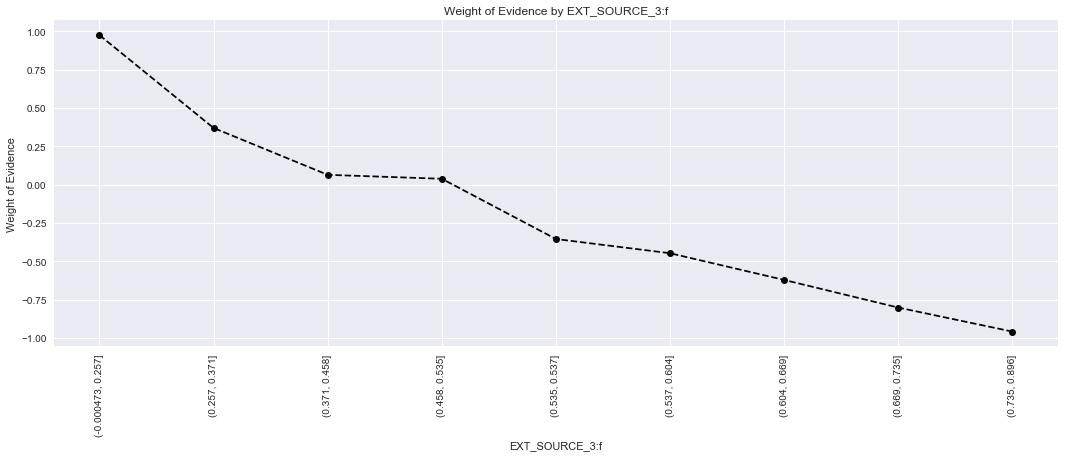

In [49]:
plot_by_woe(woe_data,90)

In [50]:
df_train["EXT_SOURCE_3:<=0.458"] = np.where(df_train["EXT_SOURCE_3"] <= 0.458,1,0)
df_train["EXT_SOURCE_3:0.458-0.535"] = np.where((df_train["EXT_SOURCE_3"] > 0.458) & (df_train["EXT_SOURCE_3"] <= 0.535),1,0)
df_train["EXT_SOURCE_3:>0.535"] = np.where(df_train["EXT_SOURCE_3"] > 0.535,1,0)

In [51]:
#bureau_DAYS_CREDIT_mean
df_temp["bureau_DAYS_CREDIT_mean:f"] = pd.qcut(df_temp["bureau_DAYS_CREDIT_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"bureau_DAYS_CREDIT_mean:f",df_target)

In [52]:
woe_data

,bureau_DAYS_CREDIT_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2922.001, -1746.0]",30802,0.049964,0.100166,1539.0,29263.0,0.061994,0.103518,-0.512706,NaN,NaN,0.115057
1,"(-1746.0, -1464.0]",30823,0.051423,0.100234,1585.0,29238.0,0.063847,0.103429,-0.482399,0.001458,0.030306,0.115057
2,"(-1464.0, -1270.0]",30704,0.056344,0.099847,1730.0,28974.0,0.069688,0.102495,-0.385792,0.004922,0.096607,0.115057
3,"(-1270.0, -1098.0]",30872,0.063132,0.100393,1949.0,28923.0,0.078510,0.102315,-0.264835,0.006787,0.120957,0.115057
4,"(-1098.0, -927.5]",30609,0.070437,0.099538,2156.0,28453.0,0.086848,0.100652,-0.147513,0.007305,0.117322,0.115057
5,"(-927.5, -747.5]",30720,0.080664,0.099899,2478.0,28242.0,0.099819,0.099906,-0.000873,0.010227,0.146641,0.115057
6,"(-747.5, -542.0]",30753,0.094332,0.100006,2901.0,27852.0,0.116858,0.098526,0.170636,0.013668,0.171509,0.115057
7,"(-542.0, -285.5]",30735,0.114918,0.099948,3532.0,27203.0,0.142276,0.096230,0.391023,0.020586,0.220386,0.115057
8,"(-285.5, 0.0]",61493,0.113102,0.199970,6955.0,54538.0,0.280161,0.192928,0.373049,0.001816,0.017974,0.115057


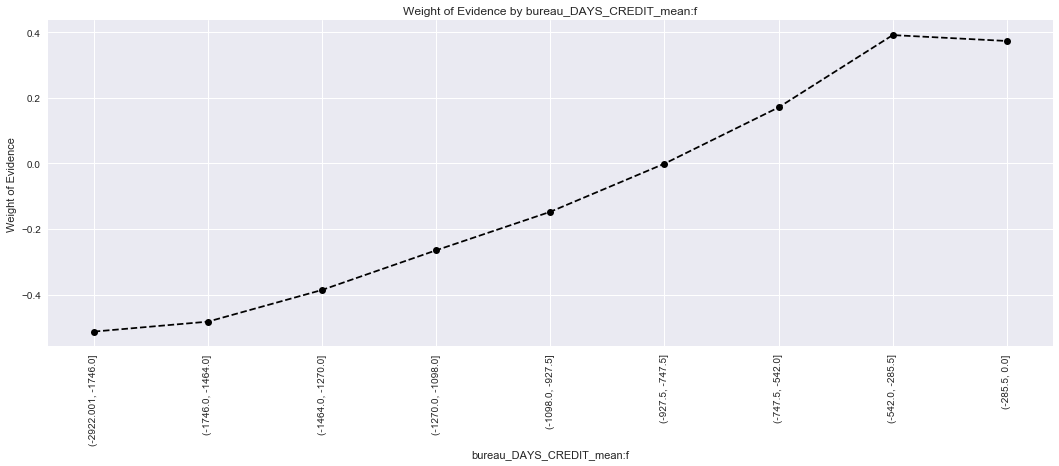

In [53]:
plot_by_woe(woe_data,90)

In [54]:
df_train["bureau_DAYS_CREDIT_mean:<-1464.0"] = np.where(df_train["bureau_DAYS_CREDIT_mean"] <= -1464.0,1,0)
df_train["bureau_DAYS_CREDIT_mean:-1464.0--1098.0"] = np.where((df_train["bureau_DAYS_CREDIT_mean"] > -1464.0) & (df_train["bureau_DAYS_CREDIT_mean"] <= -1098.0),1,0)
df_train["bureau_DAYS_CREDIT_mean:-1098.0--747.0"] = np.where((df_train["bureau_DAYS_CREDIT_mean"] > -1098.0) & (df_train["bureau_DAYS_CREDIT_mean"] <= -747.0),1,0)
df_train["bureau_DAYS_CREDIT_mean:>-747.0"] = np.where(df_train["bureau_DAYS_CREDIT_mean"] > -747.0,1,0)

In [55]:
#bureau_DAYS_CREDIT_UPDATE_mean
df_temp["bureau_DAYS_CREDIT_UPDATE_mean:f"] = pd.qcut(df_temp["bureau_DAYS_CREDIT_UPDATE_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"bureau_DAYS_CREDIT_UPDATE_mean:f",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
woe_data

,bureau_DAYS_CREDIT_UPDATE_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-41900.001, -1045.0]",30755,0.049228,0.100013,1514.0,29241.0,0.060987,0.103440,-0.528331,NaN,NaN,inf
1,"(-1045.0, -804.5]",30755,0.054430,0.100013,1674.0,29081.0,0.067432,0.102874,-0.422384,0.005202,0.105948,inf
2,"(-804.5, -647.5]",30807,0.057584,0.100182,1774.0,29033.0,0.071460,0.102704,-0.362711,0.003154,0.059673,inf
3,"(-647.5, -517.5]",30698,0.068995,0.099827,2118.0,28580.0,0.085317,0.101102,-0.169749,0.011410,0.192961,inf
4,"(-517.5, -393.0]",30777,0.073529,0.100084,2263.0,28514.0,0.091158,0.100868,-0.101218,0.004534,0.068531,inf
5,"(-393.0, -265.2]",30721,0.082842,0.099902,2545.0,28176.0,0.102518,0.099672,0.028146,0.009313,0.129364,inf
6,"(-265.2, -127.0]",30801,0.097886,0.100162,3015.0,27786.0,0.121450,0.098293,0.211553,0.015044,0.183407,inf
7,"(-127.0, -23.0]",31197,0.111132,0.101450,3467.0,27730.0,0.139658,0.098095,0.353260,0.013246,0.141707,inf
8,"(-23.0, 0.0]",60999,0.105821,0.198364,6455.0,54544.0,0.260020,0.192949,0.298333,0.005311,0.054927,inf
9,"(0.0, 14.0]",1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.105821,inf,inf


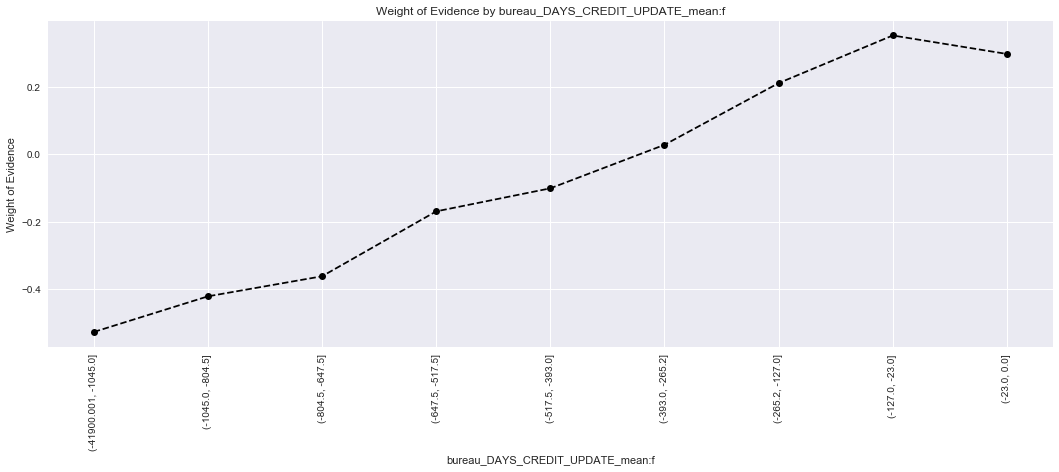

In [57]:
plot_by_woe(woe_data,90)

In [58]:
df_train["bureau_DAYS_CREDIT_UPDATE_mean:<-647.5"] = np.where(df_train["bureau_DAYS_CREDIT_UPDATE_mean"] <= -647.5,1,0)
df_train["bureau_DAYS_CREDIT_UPDATE_mean:-647.5--393.0"] = np.where((df_train["bureau_DAYS_CREDIT_UPDATE_mean"] > -647.5) & (df_train["bureau_DAYS_CREDIT_UPDATE_mean"] <= -393.0),1,0)
df_train["bureau_DAYS_CREDIT_UPDATE_mean:>-393.0"] = np.where(df_train["bureau_DAYS_CREDIT_UPDATE_mean"] > -393.0,1,0)

In [59]:
#bureau_DAYS_CREDIT_UPDATE_min
df_temp["bureau_DAYS_CREDIT_UPDATE_min:f"] = pd.qcut(df_temp["bureau_DAYS_CREDIT_UPDATE_min"],10,duplicates='drop') 
woe_data = woe_ordered_continuous(df_temp,"bureau_DAYS_CREDIT_UPDATE_min:f",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [60]:
woe_data

,bureau_DAYS_CREDIT_UPDATE_min:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-41950.001, -2352.0]",30918,0.056213,0.100543,1738.0,29180.0,0.070010,0.103224,-0.388263,NaN,NaN,inf
1,"(-2352.0, -1973.0]",30599,0.061375,0.099505,1878.0,28721.0,0.075650,0.101600,-0.294936,0.005161,0.093327,inf
2,"(-1973.0, -1483.0]",30803,0.063825,0.100169,1966.0,28837.0,0.079194,0.102011,-0.253173,0.002450,0.041763,inf
3,"(-1483.0, -1133.0]",30763,0.067289,0.100039,2070.0,28693.0,0.083384,0.101501,-0.196619,0.003464,0.056554,inf
4,"(-1133.0, -859.0]",30707,0.074804,0.099857,2297.0,28410.0,0.092528,0.100500,-0.082652,0.007515,0.113967,inf
5,"(-859.0, -606.0]",30797,0.079196,0.100149,2439.0,28358.0,0.098248,0.100316,-0.020836,0.004392,0.061816,inf
6,"(-606.0, -269.0]",30738,0.092101,0.099957,2831.0,27907.0,0.114038,0.098721,0.144238,0.012905,0.165074,inf
7,"(-269.0, -27.0]",31250,0.102688,0.101622,3209.0,28041.0,0.129265,0.099195,0.264777,0.010587,0.120539,inf
8,"(-27.0, 0.0]",60935,0.104981,0.198156,6397.0,54538.0,0.257684,0.192928,0.289417,0.002293,0.024640,inf
9,"(0.0, 14.0]",1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.104981,inf,inf


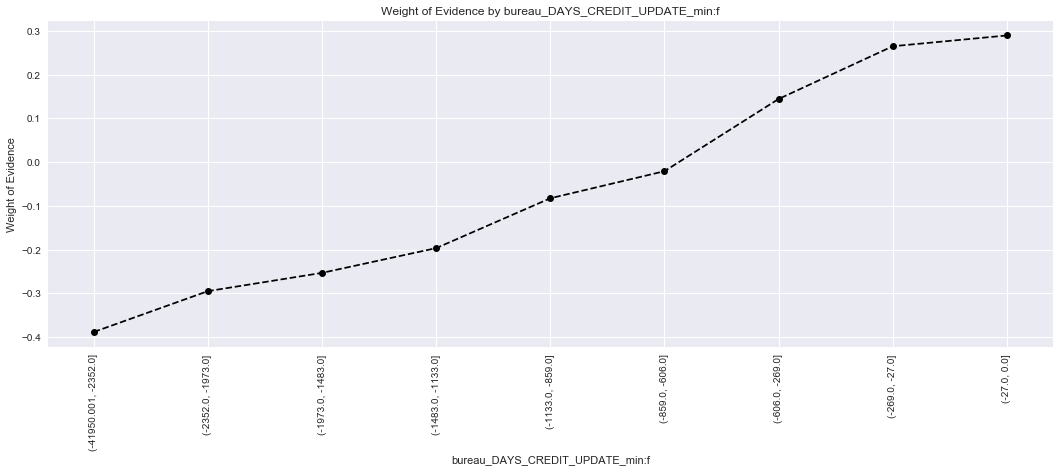

In [61]:
plot_by_woe(woe_data,90)

In [62]:
df_train["bureau_DAYS_CREDIT_UPDATE_min:<-1483.0"] = np.where(df_train["bureau_DAYS_CREDIT_UPDATE_min"] <= -1483.0,1,0)
df_train["bureau_DAYS_CREDIT_UPDATE_min:-1483.0--269.0"] = np.where((df_train["bureau_DAYS_CREDIT_UPDATE_min"] > -1483.0) & (df_train["bureau_DAYS_CREDIT_UPDATE_min"] <= -269.0),1,0)
df_train["bureau_DAYS_CREDIT_UPDATE_min:>-269.0"] = np.where(df_train["bureau_DAYS_CREDIT_UPDATE_min"] > -269.0,1,0)

In [63]:
#bureau_DAYS_CREDIT_UPDATE_sum
df_temp["bureau_DAYS_CREDIT_UPDATE_sum:f"] = pd.qcut(df_temp["bureau_DAYS_CREDIT_UPDATE_sum"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"bureau_DAYS_CREDIT_UPDATE_sum:f",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
woe_data

,bureau_DAYS_CREDIT_UPDATE_sum:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-90065.001, -7545.0]",30756,0.059923,0.100016,1843.0,28913.0,0.074240,0.102280,-0.320411,NaN,NaN,inf
1,"(-7545.0, -4963.0]",30757,0.062197,0.100019,1913.0,28844.0,0.077059,0.102035,-0.280744,0.002274,0.039667,inf
2,"(-4963.0, -3458.0]",30746,0.064724,0.099983,1990.0,28756.0,0.080161,0.101724,-0.238226,0.002527,0.042518,inf
3,"(-3458.0, -2399.0]",30756,0.069060,0.100016,2124.0,28632.0,0.085559,0.101286,-0.168738,0.004336,0.069488,inf
4,"(-2399.0, -1561.0]",30770,0.073026,0.100061,2247.0,28523.0,0.090514,0.100900,-0.108629,0.003966,0.060109,inf
5,"(-1561.0, -875.0]",30752,0.077621,0.100003,2387.0,28365.0,0.096153,0.100341,-0.042633,0.004595,0.065996,inf
6,"(-875.0, -355.0]",30768,0.090386,0.100055,2781.0,27987.0,0.112024,0.099004,0.123556,0.012765,0.166189,inf
7,"(-355.0, -36.0]",31024,0.102276,0.100887,3173.0,27851.0,0.127815,0.098523,0.260294,0.011890,0.136738,inf
8,"(-36.0, 0.0]",61181,0.104068,0.198955,6367.0,54814.0,0.256475,0.193904,0.279668,0.001793,0.019374,inf
9,"(0.0, 14.0]",1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.104068,inf,inf


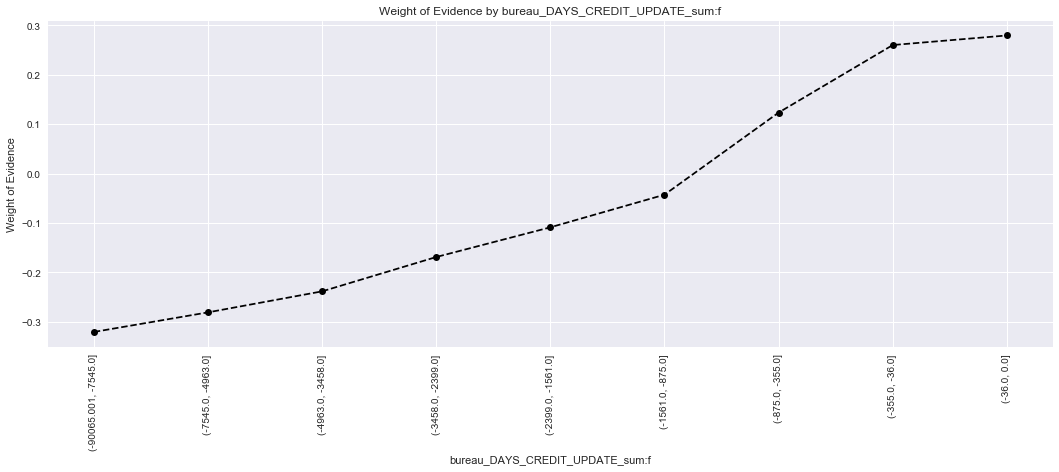

In [65]:
plot_by_woe(woe_data,90)

In [66]:
df_train["bureau_DAYS_CREDIT_UPDATE_sum:<-2399.0"] = np.where(df_train["bureau_DAYS_CREDIT_UPDATE_sum"] <= -2399.0,1,0)
df_train["bureau_DAYS_CREDIT_UPDATE_sum:-2399.0--355.0"] = np.where((df_train["bureau_DAYS_CREDIT_UPDATE_sum"] > -2399.0) & (df_train["bureau_DAYS_CREDIT_UPDATE_sum"] <= -355.0),1,0)
df_train["bureau_DAYS_CREDIT_UPDATE_sum:>-355.0"] = np.where(df_train["bureau_DAYS_CREDIT_UPDATE_sum"] > -355.0,1,0)

In [67]:
#credit_AMT_BALANCE_mean
df_temp["credit_AMT_BALANCE_mean:f"] =pd.qcut(df_temp["credit_AMT_BALANCE_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_BALANCE_mean:f",df_target)

In [68]:
woe_data

,credit_AMT_BALANCE_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2930.2340000000004, 0.0]",27333,0.055391,0.314516,1514.0,25819.0,0.200956,0.325295,-0.481649,NaN,NaN,0.139447
1,"(0.0, 9436.796]",7429,0.063131,0.085484,469.0,6960.0,0.062251,0.087689,-0.342625,0.007740,0.139024,0.139447
2,"(9436.796, 26793.605]",8691,0.071568,0.100006,622.0,8069.0,0.082559,0.101662,-0.208138,0.008437,0.134487,0.139447
3,"(26793.605, 49230.345]",8690,0.091600,0.099994,796.0,7894.0,0.105654,0.099457,0.060448,0.020031,0.268586,0.139447
4,"(49230.345, 79981.466]",8690,0.095742,0.099994,832.0,7858.0,0.110433,0.099003,0.109252,0.004143,0.048804,0.139447
5,"(79981.466, 122497.188]",8691,0.118053,0.100006,1026.0,7665.0,0.136183,0.096572,0.343710,0.022311,0.234458,0.139447
6,"(122497.188, 201679.308]",8690,0.128654,0.099994,1118.0,7572.0,0.148394,0.095400,0.441791,0.010600,0.098081,0.139447
7,"(201679.308, 928686.3]",8691,0.133126,0.100006,1157.0,7534.0,0.153570,0.094921,0.481111,0.004473,0.039320,0.139447


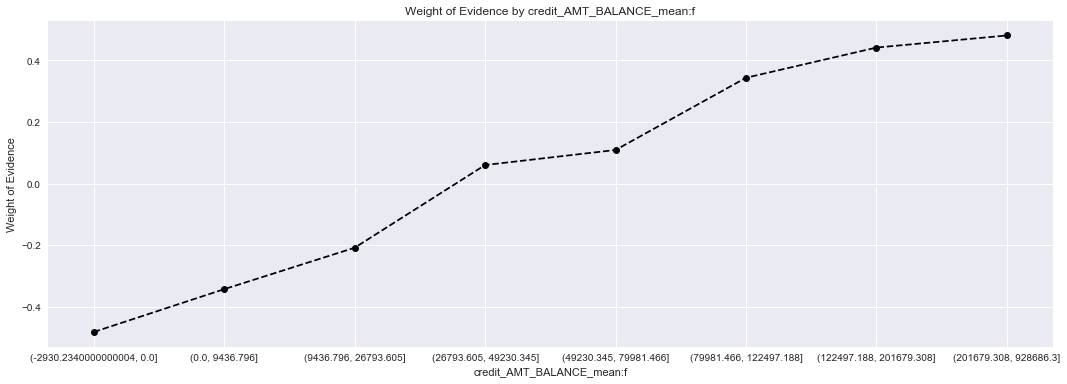

In [69]:
plot_by_woe(woe_data)

In [70]:
df_train["credit_AMT_BALANCE_mean:missing"] = np.where(df_train["credit_AMT_BALANCE_mean"].isnull(),1,0)
df_train["credit_AMT_BALANCE_mean:<26793.605"] = np.where(df_train["credit_AMT_BALANCE_mean"] <= 26793.605,1,0)
df_train["credit_AMT_BALANCE_mean:26793.605-49230.345"] = np.where((df_train["credit_AMT_BALANCE_mean"] > 26793.605) & (df_train["credit_AMT_BALANCE_mean"] <= 49230.345),1,0)
df_train["credit_AMT_BALANCE_mean:>49230.345"] = np.where(df_train["credit_AMT_BALANCE_mean"] > 49230.345,1,0)

In [71]:
#credit_AMT_BALANCE_min
df_temp["credit_AMT_BALANCE_min:f"] = pd.qcut(df_temp["credit_AMT_BALANCE_min"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_BALANCE_min:f",df_target)

In [72]:
woe_data

,credit_AMT_BALANCE_min:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-420250.201, 0.0]",74839,0.075322,0.861159,5637.0,69202.0,0.748208,0.871880,-0.152971,NaN,NaN,0.103441
1,"(0.0, 16341.471]",3375,0.142222,0.038836,480.0,2895.0,0.063711,0.036474,0.557753,0.066901,0.710723,0.103441
2,"(16341.471, 869873.56]",8691,0.163042,0.100006,1417.0,7274.0,0.188081,0.091646,0.718943,0.020820,0.161190,0.103441


In [73]:
df_train["credit_AMT_BALANCE_min:missing"] = np.where(df_train["credit_AMT_BALANCE_min"].isnull(),1,0)
df_train["credit_AMT_BALANCE_min:<0.0"] = np.where(df_train["credit_AMT_BALANCE_min"] <= 0.0,1,0)
df_train["credit_AMT_BALANCE_min:0.0-16341.471"] = np.where((df_train["credit_AMT_BALANCE_min"] > 0.0) & (df_train["credit_AMT_BALANCE_min"] <= 16341.471),1,0)
df_train["credit_AMT_BALANCE_min:>16341.471"] = np.where(df_train["credit_AMT_BALANCE_min"] > 16341.471,1,0)

In [74]:
#credit_AMT_DRAWINGS_ATM_CURRENT_count
df_temp["credit_AMT_DRAWINGS_ATM_CURRENT_count:f"] = pd.qcut(df_temp["credit_AMT_DRAWINGS_ATM_CURRENT_count"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_DRAWINGS_ATM_CURRENT_count:f",df_target)

In [75]:
woe_data

,credit_AMT_DRAWINGS_ATM_CURRENT_count:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1.0]",26212,0.055356,0.301617,1451.0,24761.0,0.192594,0.311965,-0.482310,NaN,NaN,0.187085
1,"(1.0, 8.0]",10137,0.148861,0.116645,1509.0,8628.0,0.200292,0.108705,0.611141,0.093504,1.093451,0.187085
2,"(8.0, 12.0]",7386,0.137693,0.084989,1017.0,6369.0,0.134988,0.080243,0.520122,0.011168,0.091020,0.187085
3,"(12.0, 21.0]",8898,0.118229,0.102388,1052.0,7846.0,0.139634,0.098852,0.345396,0.019464,0.174725,0.187085
4,"(21.0, 37.0]",8558,0.096752,0.098475,828.0,7730.0,0.109902,0.097391,0.120856,0.021477,0.224540,0.187085
5,"(37.0, 79.0]",8603,0.076485,0.098993,658.0,7945.0,0.087337,0.100100,-0.136386,0.020267,0.257242,0.187085
6,"(79.0, 94.0]",9432,0.062023,0.108532,585.0,8847.0,0.077648,0.111464,-0.361515,0.014462,0.225129,0.187085
7,"(94.0, 192.0]",7679,0.056518,0.088361,434.0,7245.0,0.057606,0.091280,-0.460315,0.005505,0.098800,0.187085


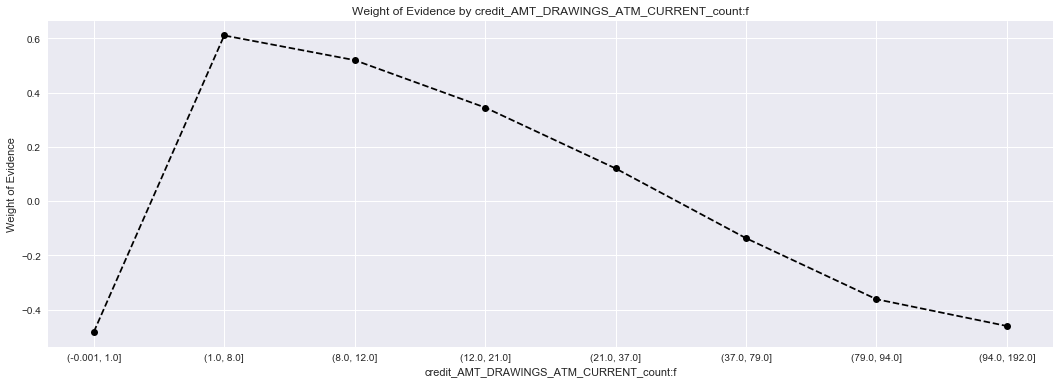

In [76]:
plot_by_woe(woe_data)

In [77]:
df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count:missing"] = np.where(df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count"].isnull(),1,0)
df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count:<1.0"] = np.where(df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count"] <= 1.0,1,0)
df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count:1.0-37.0"] = np.where((df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count"] > 1.0) & (df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count"] <= 37.0),1,0)
df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count:>37.0"] = np.where(df_train["credit_AMT_DRAWINGS_ATM_CURRENT_count"] > 37.0,1,0)

In [78]:
#credit_AMT_DRAWINGS_ATM_CURRENT_mean
df_temp["credit_AMT_DRAWINGS_ATM_CURRENT_mean:f"] = pd.qcut(df_temp["credit_AMT_DRAWINGS_ATM_CURRENT_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_DRAWINGS_ATM_CURRENT_mean:f",df_target)

In [79]:
woe_data

,credit_AMT_DRAWINGS_ATM_CURRENT_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1505.966]",43453,0.062550,0.500006,2718.0,40735.0,0.360765,0.513223,-0.352484,NaN,NaN,0.135429
1,"(1505.966, 3221.92]",8690,0.074568,0.099994,648.0,8042.0,0.086010,0.101322,-0.163835,0.012018,0.188649,0.135429
2,"(3221.92, 6701.841]",8690,0.088147,0.099994,766.0,7924.0,0.101672,0.099835,0.018238,0.013579,0.182073,0.135429
3,"(6701.841, 13500.0]",8809,0.116699,0.101364,1028.0,7781.0,0.136448,0.098033,0.330637,0.028552,0.312400,0.135429
4,"(13500.0, 25595.735]",8572,0.133341,0.098636,1143.0,7429.0,0.151712,0.093598,0.482972,0.016642,0.152335,0.135429
5,"(25595.735, 904500.0]",8691,0.141641,0.100006,1231.0,7460.0,0.163393,0.093989,0.552978,0.008300,0.070006,0.135429


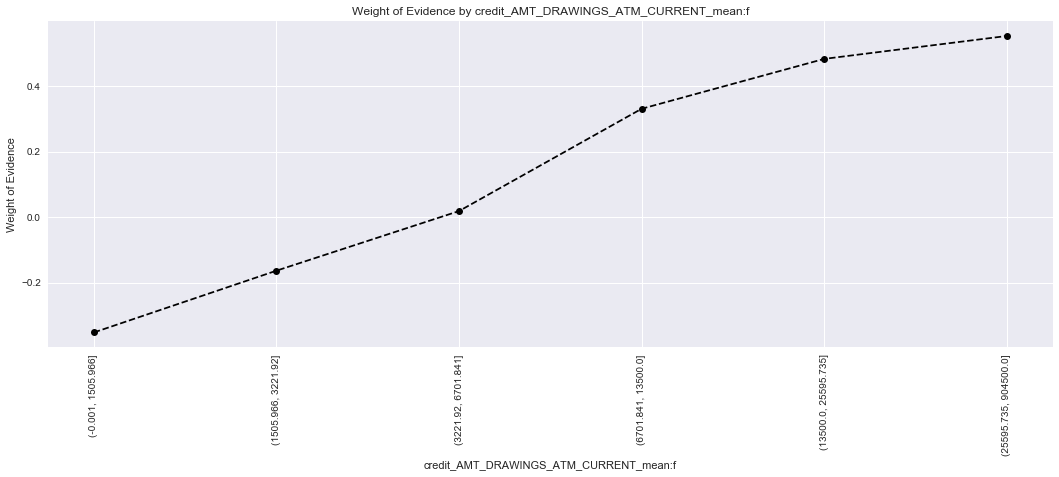

In [80]:
plot_by_woe(woe_data,90)

In [81]:
df_train["credit_AMT_DRAWINGS_ATM_CURRENT_mean:missing"] = np.where(df_train["credit_AMT_DRAWINGS_ATM_CURRENT_mean"].isnull(),1,0)
df_train["credit_AMT_DRAWINGS_ATM_CURRENT_mean:<3221.92"] = np.where(df_train["credit_AMT_DRAWINGS_ATM_CURRENT_mean"] <= 3221.92,1,0)
df_train["credit_AMT_DRAWINGS_ATM_CURRENT_mean:>3221.92"] = np.where(df_train["credit_AMT_DRAWINGS_ATM_CURRENT_mean"] > 3221.92,1,0)

In [82]:
#credit_AMT_DRAWINGS_CURRENT_mean
df_temp["credit_AMT_DRAWINGS_CURRENT_mean:f"] = pd.qcut(df_temp["credit_AMT_DRAWINGS_CURRENT_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_DRAWINGS_CURRENT_mean:f",df_target)

In [83]:
woe_data

,credit_AMT_DRAWINGS_CURRENT_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1546.875]",34763,0.055519,0.400012,1930.0,32833.0,0.256172,0.413665,-0.479207,NaN,NaN,0.156371
1,"(1546.875, 3473.672]",8690,0.067779,0.099994,589.0,8101.0,0.078179,0.102065,-0.266610,0.012260,0.212597,0.156371
2,"(3473.672, 7574.896]",8690,0.083544,0.099994,726.0,7964.0,0.096363,0.100339,-0.040430,0.015765,0.226180,0.156371
3,"(7574.896, 14369.718]",8690,0.113694,0.099994,988.0,7702.0,0.131139,0.097038,0.301154,0.030150,0.341584,0.156371
4,"(14369.718, 23131.7]",8691,0.127603,0.100006,1109.0,7582.0,0.147199,0.095526,0.432389,0.013909,0.131234,0.156371
5,"(23131.7, 38649.879]",8690,0.127503,0.099994,1108.0,7582.0,0.147067,0.095526,0.431487,0.000100,0.000902,0.156371
6,"(38649.879, 1125000.0]",8691,0.124727,0.100006,1084.0,7607.0,0.143881,0.095841,0.406296,0.002776,0.025191,0.156371


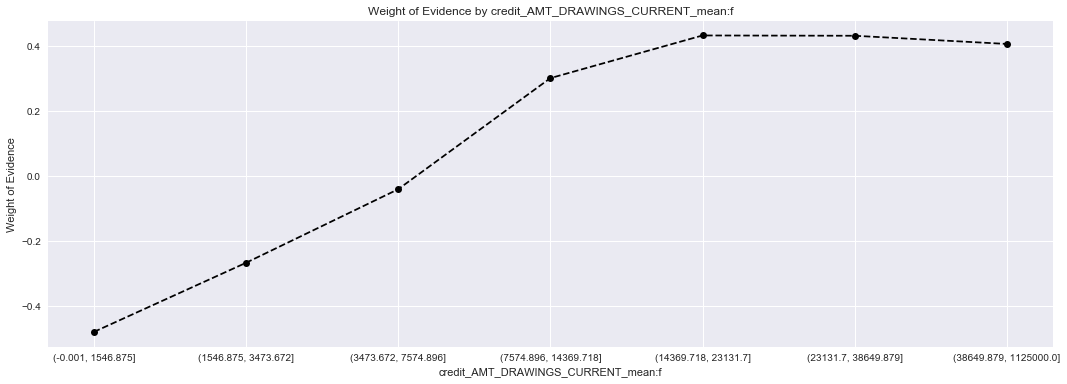

In [84]:
plot_by_woe(woe_data)

In [85]:
df_train["credit_AMT_DRAWINGS_CURRENT_mean:missing"] = np.where(df_train["credit_AMT_DRAWINGS_CURRENT_mean"].isnull(),1,0)
df_train["credit_AMT_DRAWINGS_CURRENT_mean:<7574.896"] = np.where(df_train["credit_AMT_DRAWINGS_CURRENT_mean"] <= 7574.896,1,0)
df_train["credit_AMT_DRAWINGS_CURRENT_mean:7574.896-23131.7"] = np.where((df_train["credit_AMT_DRAWINGS_CURRENT_mean"] > 7574.896) & (df_train["credit_AMT_DRAWINGS_CURRENT_mean"] <= 23131.7),1,0)
df_train["credit_AMT_DRAWINGS_CURRENT_mean:>23131.7"] = np.where(df_train["credit_AMT_DRAWINGS_CURRENT_mean"] > 23131.7,1,0)

In [86]:
#credit_AMT_DRAWINGS_OTHER_CURRENT_count
df_temp["credit_AMT_DRAWINGS_OTHER_CURRENT_count:f"] = pd.qcut(df_temp["credit_AMT_DRAWINGS_OTHER_CURRENT_count"],10,duplicates='drop')
woe_data = woe_discrete(df_temp,"credit_AMT_DRAWINGS_OTHER_CURRENT_count:f",df_target)

In [87]:
woe_data

,credit_AMT_DRAWINGS_OTHER_CURRENT_count:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1.0]",26212,0.055356,0.301617,1451.0,24761.0,0.192594,0.311965,-0.482310,NaN,NaN,0.187085
1,"(94.0, 192.0]",7679,0.056518,0.088361,434.0,7245.0,0.057606,0.091280,-0.460315,0.001161,0.021995,0.187085
2,"(79.0, 94.0]",9432,0.062023,0.108532,585.0,8847.0,0.077648,0.111464,-0.361515,0.005505,0.098800,0.187085
3,"(37.0, 79.0]",8603,0.076485,0.098993,658.0,7945.0,0.087337,0.100100,-0.136386,0.014462,0.225129,0.187085
4,"(21.0, 37.0]",8558,0.096752,0.098475,828.0,7730.0,0.109902,0.097391,0.120856,0.020267,0.257242,0.187085
5,"(12.0, 21.0]",8898,0.118229,0.102388,1052.0,7846.0,0.139634,0.098852,0.345396,0.021477,0.224540,0.187085
6,"(8.0, 12.0]",7386,0.137693,0.084989,1017.0,6369.0,0.134988,0.080243,0.520122,0.019464,0.174725,0.187085
7,"(1.0, 8.0]",10137,0.148861,0.116645,1509.0,8628.0,0.200292,0.108705,0.611141,0.011168,0.091020,0.187085


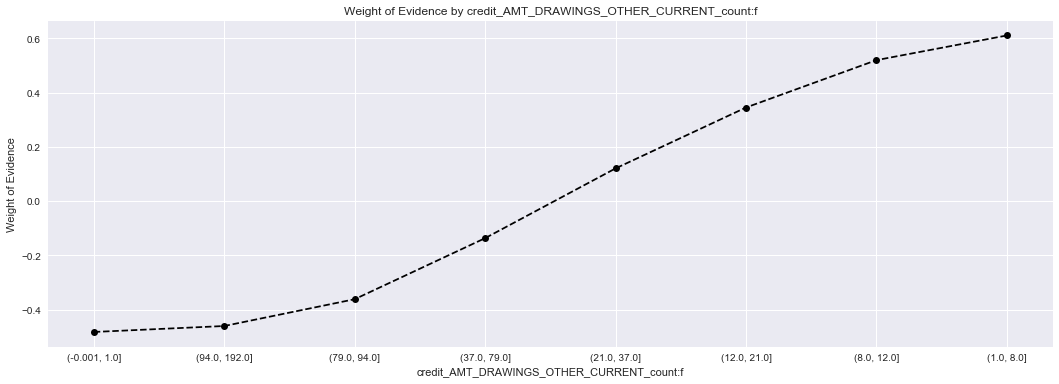

In [88]:
plot_by_woe(woe_data)

In [89]:
df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count:missing"] = np.where(df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count"].isnull(),1,0)
df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count:<21.0"] = np.where(df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count"] <= 21.0,1,0)
df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count:21.0-37.0"] = np.where((df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count"] > 21.0) & (df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count"] <= 37.0),1,0)
df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count:>37.0"] = np.where(df_train["credit_AMT_DRAWINGS_OTHER_CURRENT_count"] > 37.0,1,0)

In [90]:
#credit_AMT_DRAWINGS_POS_CURRENT_count
df_temp["credit_AMT_DRAWINGS_POS_CURRENT_count:f"] = pd.qcut(df_temp["credit_AMT_DRAWINGS_POS_CURRENT_count"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_DRAWINGS_POS_CURRENT_count:f",df_target)

In [91]:
woe_data

,credit_AMT_DRAWINGS_POS_CURRENT_count:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1.0]",26212,0.055356,0.301617,1451.0,24761.0,0.192594,0.311965,-0.482310,NaN,NaN,0.187085
1,"(1.0, 8.0]",10137,0.148861,0.116645,1509.0,8628.0,0.200292,0.108705,0.611141,0.093504,1.093451,0.187085
2,"(8.0, 12.0]",7386,0.137693,0.084989,1017.0,6369.0,0.134988,0.080243,0.520122,0.011168,0.091020,0.187085
3,"(12.0, 21.0]",8898,0.118229,0.102388,1052.0,7846.0,0.139634,0.098852,0.345396,0.019464,0.174725,0.187085
4,"(21.0, 37.0]",8558,0.096752,0.098475,828.0,7730.0,0.109902,0.097391,0.120856,0.021477,0.224540,0.187085
5,"(37.0, 79.0]",8603,0.076485,0.098993,658.0,7945.0,0.087337,0.100100,-0.136386,0.020267,0.257242,0.187085
6,"(79.0, 94.0]",9432,0.062023,0.108532,585.0,8847.0,0.077648,0.111464,-0.361515,0.014462,0.225129,0.187085
7,"(94.0, 192.0]",7679,0.056518,0.088361,434.0,7245.0,0.057606,0.091280,-0.460315,0.005505,0.098800,0.187085


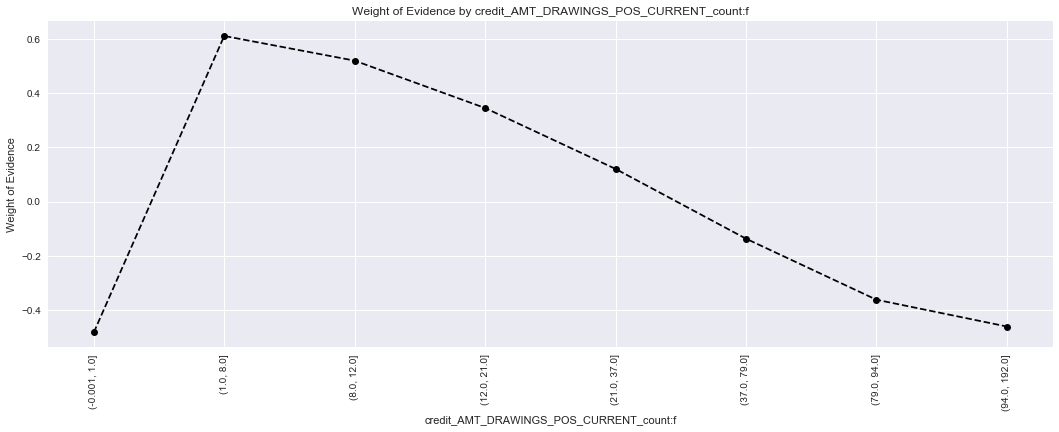

In [92]:
plot_by_woe(woe_data,90)

In [93]:
df_train["credit_AMT_DRAWINGS_POS_CURRENT_count:missing"] = np.where(df_train["credit_AMT_DRAWINGS_POS_CURRENT_count"].isnull(),1,0)
df_train["credit_AMT_DRAWINGS_POS_CURRENT_count:<1.0"] = np.where(df_train["credit_AMT_DRAWINGS_POS_CURRENT_count"] <= 1.0,1,0)
df_train["credit_AMT_DRAWINGS_POS_CURRENT_count:1.0-37.0"] = np.where((df_train["credit_AMT_DRAWINGS_POS_CURRENT_count"] > 1.0) & (df_train["credit_AMT_DRAWINGS_POS_CURRENT_count"]<=37.0),1,0)
df_train["credit_AMT_DRAWINGS_POS_CURRENT_count:>37.0"] = np.where(df_train["credit_AMT_DRAWINGS_POS_CURRENT_count"] > 37.0,1,0)

In [94]:
#credit_AMT_INST_MIN_REGULARITY_mean
df_temp["credit_AMT_INST_MIN_REGULARITY_mean:f"] = pd.qcut(df_temp["credit_AMT_INST_MIN_REGULARITY_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_INST_MIN_REGULARITY_mean:f",df_target)

In [95]:
woe_data

,credit_AMT_INST_MIN_REGULARITY_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 762.5]",34763,0.058827,0.400012,2045.0,32718.0,0.271436,0.412216,-0.417821,NaN,NaN,0.103994
1,"(762.5, 1699.0]",8694,0.080630,0.100040,701.0,7993.0,0.093045,0.100704,-0.079107,0.021803,0.338714,0.103994
2,"(1699.0, 2804.0]",8687,0.096121,0.099960,835.0,7852.0,0.110831,0.098928,0.113615,0.015490,0.192722,0.103994
3,"(2804.0, 4184.0]",8700,0.108161,0.100109,941.0,7759.0,0.124900,0.097756,0.245041,0.012040,0.131426,0.103994
4,"(4184.0, 6190.0]",8690,0.109436,0.099994,951.0,7739.0,0.126228,0.097504,0.258193,0.001275,0.013152,0.103994
5,"(6190.0, 9810.0]",8684,0.111930,0.099925,972.0,7712.0,0.129015,0.097164,0.283530,0.002494,0.025337,0.103994
6,"(9810.0, 43000.0]",8687,0.125360,0.099960,1089.0,7598.0,0.144545,0.095728,0.412082,0.013430,0.128552,0.103994


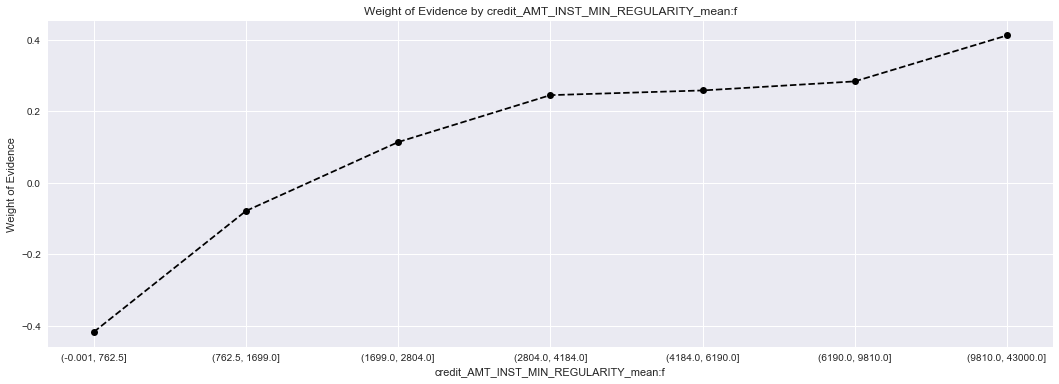

In [96]:
plot_by_woe(woe_data)

In [97]:
df_train["credit_AMT_INST_MIN_REGULARITY_mean:missing"] = np.where(df_train["credit_AMT_INST_MIN_REGULARITY_mean"].isnull(),1,0)
df_train["credit_AMT_INST_MIN_REGULARITY_mean:<1699.0"] = np.where(df_train["credit_AMT_INST_MIN_REGULARITY_mean"] <= 1699.0,1,0)
df_train["credit_AMT_INST_MIN_REGULARITY_mean:1699.0-2804.0"] = np.where((df_train["credit_AMT_INST_MIN_REGULARITY_mean"] > 1699.0) & (df_train["credit_AMT_INST_MIN_REGULARITY_mean"] <= 2804.0),1,0)
df_train["credit_AMT_INST_MIN_REGULARITY_mean:2804.0-9810.0"] = np.where((df_train["credit_AMT_INST_MIN_REGULARITY_mean"] > 2804.0) & (df_train["credit_AMT_INST_MIN_REGULARITY_mean"] <= 9810.0),1,0)
df_train["credit_AMT_INST_MIN_REGULARITY_mean:>9810.0"] = np.where(df_train["credit_AMT_INST_MIN_REGULARITY_mean"] > 9810.0,1,0)

In [98]:
#credit_AMT_PAYMENT_CURRENT_count
df_temp["credit_AMT_PAYMENT_CURRENT_count:f"] = pd.qcut(df_temp["credit_AMT_PAYMENT_CURRENT_count"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_PAYMENT_CURRENT_count:f",df_target)

In [99]:
woe_data

,credit_AMT_PAYMENT_CURRENT_count:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1.0]",26286,0.056304,0.302468,1480.0,24806.0,0.196443,0.312532,-0.464337,NaN,NaN,0.184349
1,"(1.0, 7.0]",9551,0.153073,0.109902,1462.0,8089.0,0.194054,0.101914,0.644007,0.096769,1.108344,0.184349
2,"(7.0, 11.0]",7661,0.134708,0.088154,1032.0,6629.0,0.136979,0.083519,0.494752,0.018365,0.149256,0.184349
3,"(11.0, 20.0]",9184,0.116071,0.105679,1066.0,8118.0,0.141492,0.102279,0.324536,0.018637,0.170215,0.184349
4,"(20.0, 36.0]",8449,0.097526,0.097221,824.0,7625.0,0.109371,0.096068,0.129690,0.018545,0.194847,0.184349
5,"(36.0, 80.0]",8751,0.074849,0.100696,655.0,8096.0,0.086939,0.102002,-0.159783,0.022678,0.289473,0.184349
6,"(80.0, 94.0]",8630,0.063384,0.099304,547.0,8083.0,0.072604,0.101838,-0.338363,0.011465,0.178579,0.184349
7,"(94.0, 192.0]",8393,0.055761,0.096577,468.0,7925.0,0.062118,0.099848,-0.474602,0.007623,0.136240,0.184349


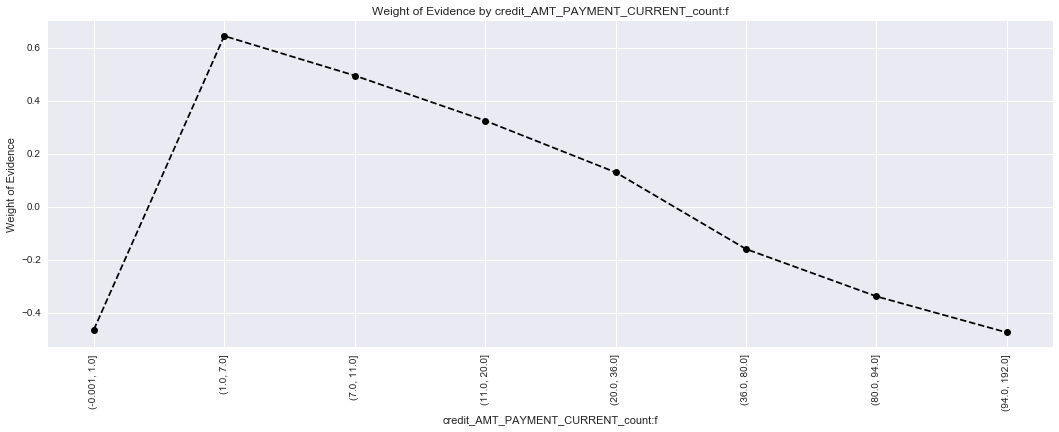

In [100]:
plot_by_woe(woe_data,90)

In [101]:
df_train["credit_AMT_PAYMENT_CURRENT_count:missing"] = np.where(df_train["credit_AMT_PAYMENT_CURRENT_count"].isnull(),1,0)
df_train["credit_AMT_PAYMENT_CURRENT_count:<1.0"] = np.where(df_train["credit_AMT_PAYMENT_CURRENT_count"] <= 1.0,1,0)
df_train["credit_AMT_PAYMENT_CURRENT_count:1.0-7.0"] = np.where((df_train["credit_AMT_PAYMENT_CURRENT_count"] > 1.0) & (df_train["credit_AMT_PAYMENT_CURRENT_count"] <= 7.0),1,0)
df_train["credit_AMT_PAYMENT_CURRENT_count:7.0-36.0"] = np.where((df_train["credit_AMT_PAYMENT_CURRENT_count"] > 7.0) & (df_train["credit_AMT_PAYMENT_CURRENT_count"] <= 36.0),1,0) 
df_train["credit_AMT_PAYMENT_CURRENT_count:>36.0"] = np.where(df_train["credit_AMT_PAYMENT_CURRENT_count"] > 36.0,1,0)

In [102]:
#credit_AMT_PAYMENT_CURRENT_sum
df_temp["credit_AMT_PAYMENT_CURRENT_sum:f"] = pd.qcut(df_temp["credit_AMT_PAYMENT_CURRENT_sum"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_PAYMENT_CURRENT_sum:f",df_target)

In [103]:
woe_data

,credit_AMT_PAYMENT_CURRENT_sum:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 450.0]",26113,0.055873,0.300478,1459.0,24654.0,0.193655,0.310617,-0.472481,NaN,NaN,0.120165
1,"(450.0, 69289.56]",8649,0.149266,0.099522,1291.0,7358.0,0.171357,0.092704,0.614336,0.093393,1.086817,0.120165
2,"(69289.56, 145804.5]",8691,0.117478,0.100006,1021.0,7670.0,0.135519,0.096635,0.338173,0.031788,0.276163,0.120165
3,"(145804.5, 241378.756]",8690,0.099885,0.099994,868.0,7822.0,0.115211,0.098550,0.156203,0.017593,0.181970,0.120165
4,"(241378.756, 362255.004]",8690,0.084580,0.099994,735.0,7955.0,0.097558,0.100226,-0.026978,0.015305,0.183182,0.120165
5,"(362255.004, 535828.24]",8691,0.083074,0.100006,722.0,7969.0,0.095832,0.100402,-0.046582,0.001506,0.019604,0.120165
6,"(535828.24, 819730.1]",8690,0.081703,0.099994,710.0,7980.0,0.094239,0.100540,-0.064722,0.001371,0.018140,0.120165
7,"(819730.1, 19347594.0]",8691,0.083765,0.100006,728.0,7963.0,0.096629,0.100326,-0.037553,0.002062,0.027169,0.120165


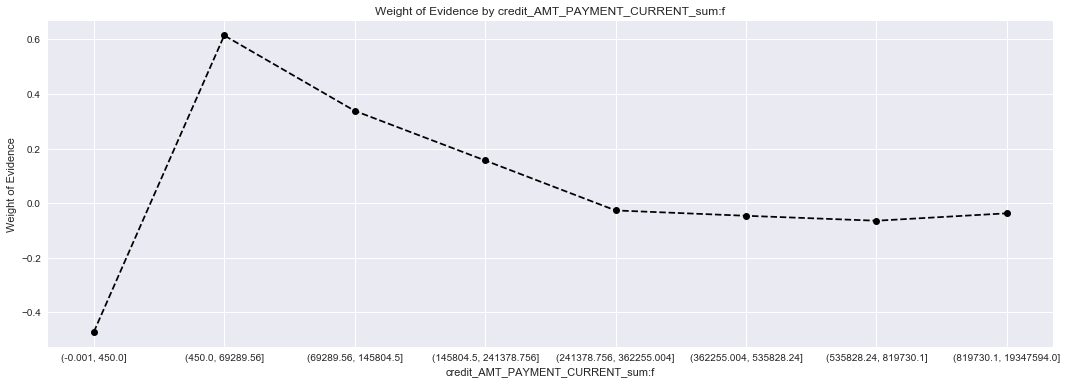

In [104]:
plot_by_woe(woe_data)

In [105]:
df_train["credit_AMT_PAYMENT_CURRENT_sum:missing"] = np.where(df_train["credit_AMT_PAYMENT_CURRENT_sum"].isnull(),1,0)
df_train["credit_AMT_PAYMENT_CURRENT_sum:<450.0"] = np.where(df_train["credit_AMT_PAYMENT_CURRENT_sum"] <= 450.0,1,0)
df_train["credit_AMT_PAYMENT_CURRENT_sum:450.0-69289.56"] = np.where((df_train["credit_AMT_PAYMENT_CURRENT_sum"] > 450.0) & (df_train["credit_AMT_PAYMENT_CURRENT_sum"] <= 69289.56),1,0)
df_train["credit_AMT_PAYMENT_CURRENT_sum:69289.56-241378.756"] = np.where((df_train["credit_AMT_PAYMENT_CURRENT_sum"] > 69289.56) & (df_train["credit_AMT_PAYMENT_CURRENT_sum"] <= 241378.756),1,0)
df_train["credit_AMT_PAYMENT_CURRENT_sum:>241378.756"] = np.where(df_train["credit_AMT_PAYMENT_CURRENT_sum"] > 241378.756,1,0)

In [106]:
#credit_AMT_RECEIVABLE_PRINCIPAL_mean
df_temp["credit_AMT_RECEIVABLE_PRINCIPAL_mean:f"] = pd.qcut(df_temp["credit_AMT_RECEIVABLE_PRINCIPAL_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_RECEIVABLE_PRINCIPAL_mean:f",df_target)

In [107]:
woe_data

,credit_AMT_RECEIVABLE_PRINCIPAL_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2930.2340000000004, 0.0]",28025,0.056164,0.322479,1574.0,26451.0,0.208920,0.333258,-0.466967,NaN,NaN,0.136631
1,"(0.0, 9007.658]",6737,0.061155,0.077521,412.0,6325.0,0.054685,0.079689,-0.376535,0.004991,0.090432,0.136631
2,"(9007.658, 25546.994]",8691,0.072029,0.100006,626.0,8065.0,0.083090,0.101611,-0.201232,0.010874,0.175303,0.136631
3,"(25546.994, 47094.63]",8690,0.092060,0.099994,800.0,7890.0,0.106185,0.099407,0.065967,0.020031,0.267199,0.136631
4,"(47094.63, 76672.475]",8690,0.095972,0.099994,834.0,7856.0,0.110698,0.098978,0.111908,0.003913,0.045940,0.136631
5,"(76672.475, 117680.653]",8691,0.118283,0.100006,1028.0,7663.0,0.136448,0.096547,0.345919,0.022311,0.234011,0.136631
6,"(117680.653, 194203.2]",8690,0.127043,0.099994,1104.0,7586.0,0.146536,0.095576,0.427342,0.008759,0.081424,0.136631
7,"(194203.2, 884547.9]",8691,0.133011,0.100006,1156.0,7535.0,0.153438,0.094934,0.480114,0.005969,0.052771,0.136631


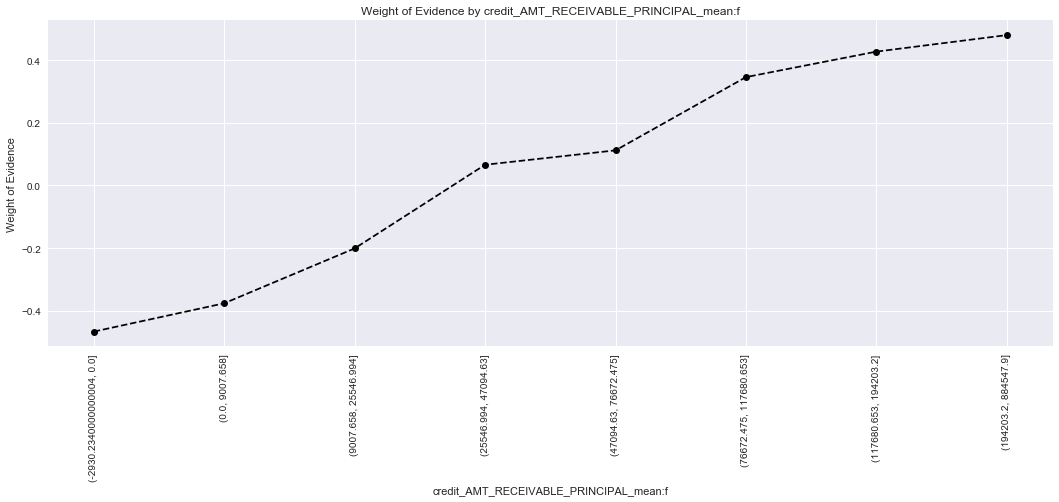

In [108]:
plot_by_woe(woe_data,90)

In [109]:
df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean:missing"] = np.where(df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean"].isnull(),1,0)
df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean:<25546.994"] = np.where(df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean"] <= 25546.994,1,0)
df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean:25546.994-76672.475"] = np.where((df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean"] > 25546.994) & (df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean"] <= 76672.475),1,0)
df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean:>76672.475"] = np.where(df_train["credit_AMT_RECEIVABLE_PRINCIPAL_mean"] > 76672.475,1,0)

In [110]:
#credit_AMT_RECIVABLE_mean
df_temp["credit_AMT_RECIVABLE_mean:f"] = pd.qcut(df_temp["credit_AMT_RECIVABLE_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_RECIVABLE_mean:f",df_target)

In [111]:
woe_data

,credit_AMT_RECIVABLE_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2930.2340000000004, 0.0]",27588,0.056111,0.317450,1548.0,26040.0,0.205469,0.328080,-0.467963,NaN,NaN,0.137343
1,"(0.0, 9313.227]",7174,0.060496,0.082550,434.0,6740.0,0.057606,0.084918,-0.388064,0.004385,0.079899,0.137343
2,"(9313.227, 26559.053]",8691,0.071913,0.100006,625.0,8066.0,0.082957,0.101624,-0.202954,0.011417,0.185109,0.137343
3,"(26559.053, 48856.728]",8690,0.092520,0.099994,804.0,7886.0,0.106716,0.099356,0.071462,0.020607,0.274416,0.137343
4,"(48856.728, 79455.228]",8690,0.096087,0.099994,835.0,7855.0,0.110831,0.098966,0.113233,0.003567,0.041771,0.137343
5,"(79455.228, 121549.705]",8691,0.117938,0.100006,1025.0,7666.0,0.136050,0.096584,0.342605,0.021851,0.229371,0.137343
6,"(121549.705, 200343.158]",8690,0.127618,0.099994,1109.0,7581.0,0.147199,0.095513,0.432521,0.009680,0.089916,0.137343
7,"(200343.158, 913096.6]",8691,0.132781,0.100006,1154.0,7537.0,0.153172,0.094959,0.478117,0.005163,0.045596,0.137343


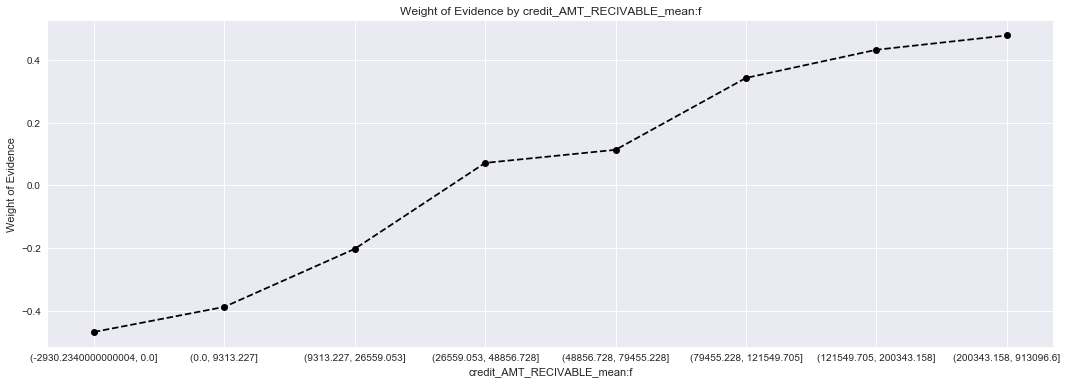

In [112]:
plot_by_woe(woe_data)

In [113]:
df_train["credit_AMT_RECIVABLE_mean:missing"] = np.where(df_train["credit_AMT_RECIVABLE_mean"].isnull(),1,0)
df_train["credit_AMT_RECIVABLE_mean:<26559.053"] = np.where(df_train["credit_AMT_RECIVABLE_mean"] <= 26559.053,1,0)
df_train["credit_AMT_RECIVABLE_mean:26559.053-79455.228"] = np.where((df_train["credit_AMT_RECIVABLE_mean"] > 26559.053) & (df_train["credit_AMT_RECIVABLE_mean"] <= 79455.228),1,0)
df_train["credit_AMT_RECIVABLE_mean:>79455.228"] = np.where(df_train["credit_AMT_RECIVABLE_mean"] > 79455.228,1,0)

In [114]:
#credit_AMT_TOTAL_RECEIVABLE_mean
df_temp["credit_AMT_TOTAL_RECEIVABLE_mean:f"] = pd.qcut(df_temp["credit_AMT_TOTAL_RECEIVABLE_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_AMT_TOTAL_RECEIVABLE_mean:f",df_target)

In [115]:
woe_data

,credit_AMT_TOTAL_RECEIVABLE_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2930.2340000000004, 0.0]",27587,0.056113,0.317439,1548.0,26039.0,0.205469,0.328067,-0.467925,NaN,NaN,0.137306
1,"(0.0, 9319.337]",7175,0.060488,0.082561,434.0,6741.0,0.057606,0.084930,-0.388212,0.004374,0.079713,0.137306
2,"(9319.337, 26559.8]",8691,0.071913,0.100006,625.0,8066.0,0.082957,0.101624,-0.202954,0.011426,0.185258,0.137306
3,"(26559.8, 48867.226]",8690,0.092290,0.099994,802.0,7888.0,0.106451,0.099381,0.068718,0.020377,0.271672,0.137306
4,"(48867.226, 79457.202]",8690,0.096433,0.099994,838.0,7852.0,0.111229,0.098928,0.117201,0.004143,0.048484,0.137306
5,"(79457.202, 121551.384]",8691,0.117823,0.100006,1024.0,7667.0,0.135917,0.096597,0.341498,0.021390,0.224297,0.137306
6,"(121551.384, 200343.158]",8690,0.127618,0.099994,1109.0,7581.0,0.147199,0.095513,0.432521,0.009795,0.091022,0.137306
7,"(200343.158, 913096.6]",8691,0.132781,0.100006,1154.0,7537.0,0.153172,0.094959,0.478117,0.005163,0.045596,0.137306


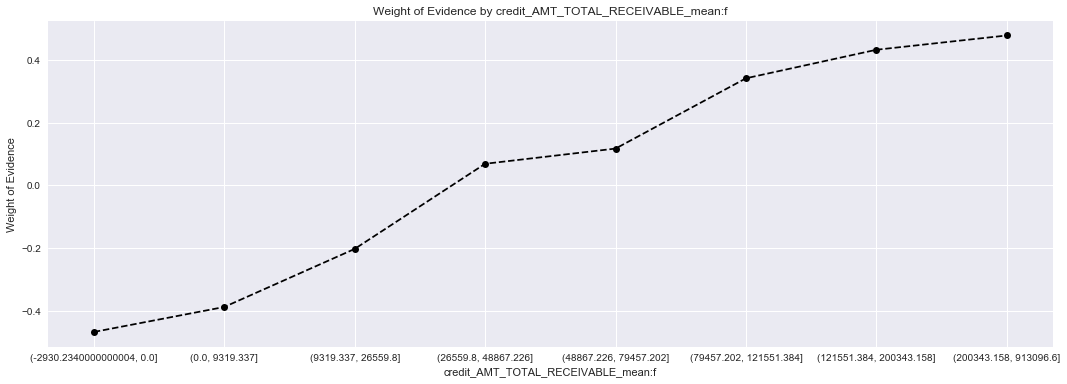

In [116]:
plot_by_woe(woe_data)

In [117]:
df_train["credit_AMT_TOTAL_RECEIVABLE_mean:missing"] = np.where(df_train["credit_AMT_TOTAL_RECEIVABLE_mean"].isnull(),1,0)
df_train["credit_AMT_TOTAL_RECEIVABLE_mean:<26559.8"] = np.where(df_train["credit_AMT_TOTAL_RECEIVABLE_mean"] <= 26559.8,1,0)
df_train["credit_AMT_TOTAL_RECEIVABLE_mean:26559.8-79457.202"] = np.where((df_train["credit_AMT_TOTAL_RECEIVABLE_mean"] > 26559.8) & (df_train["credit_AMT_TOTAL_RECEIVABLE_mean"] <= 79457.202),1,0)
df_train["credit_AMT_TOTAL_RECEIVABLE_mean:>79457.202"] = np.where(df_train["credit_AMT_TOTAL_RECEIVABLE_mean"] > 79457.202,1,0)

In [118]:
#credit_CNT_DRAWINGS_ATM_CURRENT_count
df_temp["credit_CNT_DRAWINGS_ATM_CURRENT_count:f"] =  pd.qcut(df_temp["credit_CNT_DRAWINGS_ATM_CURRENT_count"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_CNT_DRAWINGS_ATM_CURRENT_count:f",df_target)

In [119]:
woe_data

,credit_CNT_DRAWINGS_ATM_CURRENT_count:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1.0]",26212,0.055356,0.301617,1451.0,24761.0,0.192594,0.311965,-0.482310,NaN,NaN,0.187085
1,"(1.0, 8.0]",10137,0.148861,0.116645,1509.0,8628.0,0.200292,0.108705,0.611141,0.093504,1.093451,0.187085
2,"(8.0, 12.0]",7386,0.137693,0.084989,1017.0,6369.0,0.134988,0.080243,0.520122,0.011168,0.091020,0.187085
3,"(12.0, 21.0]",8898,0.118229,0.102388,1052.0,7846.0,0.139634,0.098852,0.345396,0.019464,0.174725,0.187085
4,"(21.0, 37.0]",8558,0.096752,0.098475,828.0,7730.0,0.109902,0.097391,0.120856,0.021477,0.224540,0.187085
5,"(37.0, 79.0]",8603,0.076485,0.098993,658.0,7945.0,0.087337,0.100100,-0.136386,0.020267,0.257242,0.187085
6,"(79.0, 94.0]",9432,0.062023,0.108532,585.0,8847.0,0.077648,0.111464,-0.361515,0.014462,0.225129,0.187085
7,"(94.0, 192.0]",7679,0.056518,0.088361,434.0,7245.0,0.057606,0.091280,-0.460315,0.005505,0.098800,0.187085


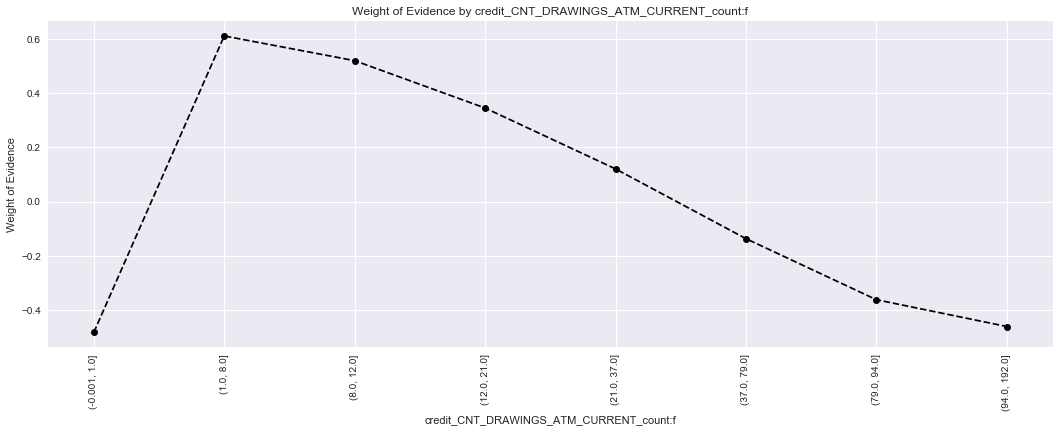

In [120]:
plot_by_woe(woe_data,90)

In [121]:
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count:missing"] = np.where(df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count"].isnull(),1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count:<1.0"] =np.where(df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count"] <=1.0,1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count:1.0-12.0"] = np.where((df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count"] > 1.0) & (df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count"] <= 12.0),1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count:12.0-37.0"] = np.where((df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count"] > 12.0) & (df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count"] <= 37.0),1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count:>37.0"] =np.where(df_train["credit_CNT_DRAWINGS_ATM_CURRENT_count"] > 37.0,1,0)

In [122]:
#credit_CNT_DRAWINGS_ATM_CURRENT_mean
df_temp["credit_CNT_DRAWINGS_ATM_CURRENT_mean:f"] = pd.qcut(df_temp["credit_CNT_DRAWINGS_ATM_CURRENT_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_CNT_DRAWINGS_ATM_CURRENT_mean:f",df_target)

In [123]:
woe_data

,credit_CNT_DRAWINGS_ATM_CURRENT_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.087]",43484,0.059884,0.500362,2604.0,40880.0,0.345633,0.515050,-0.398885,NaN,NaN,0.189024
1,"(0.087, 0.2]",8963,0.072520,0.103136,650.0,8313.0,0.086276,0.104736,-0.193897,0.012636,0.204989,0.189024
2,"(0.2, 0.364]",8533,0.085316,0.098188,728.0,7805.0,0.096629,0.098336,-0.017512,0.012795,0.176385,0.189024
3,"(0.364, 0.639]",8556,0.104605,0.098452,895.0,7661.0,0.118795,0.096521,0.207633,0.019289,0.225145,0.189024
4,"(0.639, 1.167]",8740,0.134439,0.100570,1175.0,7565.0,0.155960,0.095312,0.492443,0.029834,0.284810,0.189024
5,"(1.167, 35.0]",8629,0.171746,0.099292,1482.0,7147.0,0.196708,0.090045,0.781407,0.037307,0.288964,0.189024


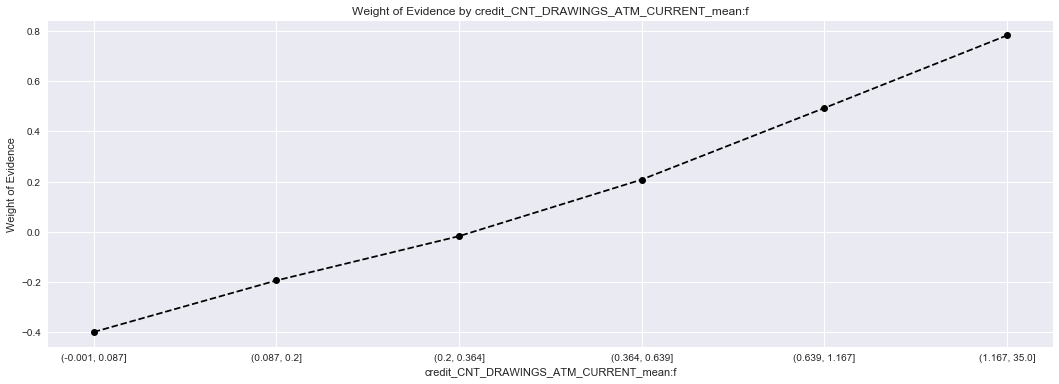

In [124]:
plot_by_woe(woe_data)

In [125]:
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean:missing"] = np.where(df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"].isnull(),1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean:<0.087"] = np.where(df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"] <= 0.087,1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean:0.087-0.364"] = np.where((df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"] > 0.087) & (df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"] <= 0.364),1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean:0.364-0.639"] = np.where((df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"] > 0.364) & (df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"] <= 0.639),1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean:0.639-1.167"] = np.where((df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"] > 0.639) & (df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"] <= 1.167),1,0)
df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean:>1.167"] = np.where(df_train["credit_CNT_DRAWINGS_ATM_CURRENT_mean"] > 1.167,1,0)

In [126]:
#credit_CNT_DRAWINGS_CURRENT_mean
df_temp["credit_CNT_DRAWINGS_CURRENT_mean:f"] = pd.qcut(df_temp["credit_CNT_DRAWINGS_CURRENT_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_CNT_DRAWINGS_CURRENT_mean:f",df_target)

In [127]:
woe_data

,credit_CNT_DRAWINGS_CURRENT_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.08]",34774,0.055041,0.400138,1914.0,32860.0,0.254048,0.414005,-0.488354,NaN,NaN,0.197964
1,"(0.08, 0.216]",8680,0.063249,0.099879,549.0,8131.0,0.072870,0.102443,-0.340634,0.008208,0.147720,0.197964
2,"(0.216, 0.452]",8693,0.072932,0.100029,634.0,8059.0,0.084152,0.101536,-0.187789,0.009683,0.152845,0.197964
3,"(0.452, 0.929]",8689,0.097710,0.099983,849.0,7840.0,0.112689,0.098777,0.131772,0.024778,0.319561,0.197964
4,"(0.929, 1.9]",8707,0.121511,0.100190,1058.0,7649.0,0.140430,0.096370,0.376512,0.023802,0.244740,0.197964
5,"(1.9, 4.383]",8683,0.138892,0.099914,1206.0,7477.0,0.160074,0.094203,0.530184,0.017381,0.153672,0.197964
6,"(4.383, 118.25]",8679,0.152552,0.099868,1324.0,7355.0,0.175737,0.092666,0.639984,0.013660,0.109800,0.197964


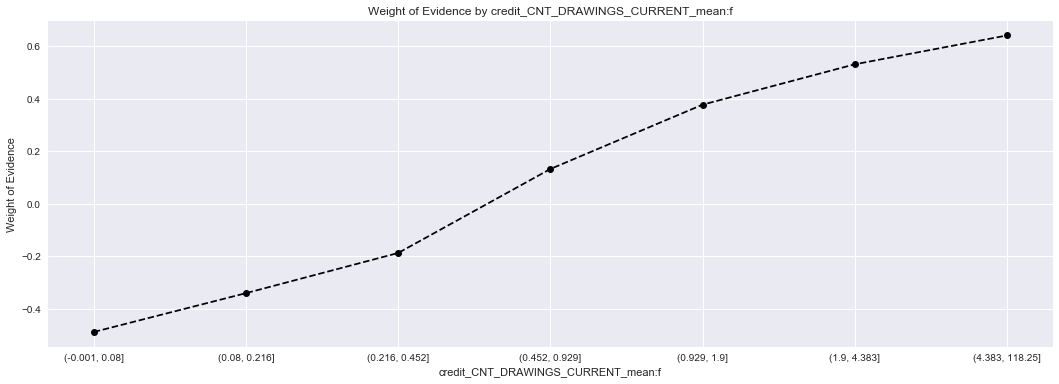

In [128]:
plot_by_woe(woe_data)

In [129]:
df_train["credit_CNT_DRAWINGS_CURRENT_mean:missing"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_mean"].isnull(),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_mean:<0.216"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_mean"] <= 0.216,1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_mean:0.216-0.929"] = np.where((df_train["credit_CNT_DRAWINGS_CURRENT_mean"] > 0.216) & (df_train["credit_CNT_DRAWINGS_CURRENT_mean"] <= 0.929),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_mean:0.929-1.9"] = np.where((df_train["credit_CNT_DRAWINGS_CURRENT_mean"] > 0.929) & (df_train["credit_CNT_DRAWINGS_CURRENT_mean"] <= 1.9),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_mean:1.9-4.383"] = np.where((df_train["credit_CNT_DRAWINGS_CURRENT_mean"] > 1.9) & (df_train["credit_CNT_DRAWINGS_CURRENT_mean"] <= 4.383),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_mean:>4.383"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_mean"] > 4.383,1,0)

In [130]:
#credit_CNT_DRAWINGS_CURRENT_max
df_temp["credit_CNT_DRAWINGS_CURRENT_max:f"] = pd.qcut(df_temp["credit_CNT_DRAWINGS_CURRENT_max"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_CNT_DRAWINGS_CURRENT_max:f",df_target)

In [131]:
woe_data

,credit_CNT_DRAWINGS_CURRENT_max:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 2.0]",37071,0.057619,0.426569,2136.0,34935.0,0.283515,0.440148,-0.439847,NaN,NaN,0.158886
1,"(2.0, 3.0]",6457,0.074957,0.074300,484.0,5973.0,0.064242,0.075254,-0.158213,0.017338,0.281635,0.158886
2,"(3.0, 5.0]",11967,0.082811,0.137702,991.0,10976.0,0.131537,0.138287,-0.050045,0.007854,0.108168,0.158886
3,"(5.0, 7.0]",7597,0.097670,0.087417,742.0,6855.0,0.098487,0.086367,0.131323,0.014859,0.181367,0.158886
4,"(7.0, 10.0]",6892,0.112014,0.079305,772.0,6120.0,0.102469,0.077106,0.284374,0.014344,0.153052,0.158886
5,"(10.0, 18.0]",8454,0.129998,0.097279,1099.0,7355.0,0.145872,0.092666,0.453727,0.017984,0.169353,0.158886
6,"(18.0, 165.0]",8467,0.154718,0.097428,1310.0,7157.0,0.173878,0.090171,0.656643,0.024721,0.202916,0.158886


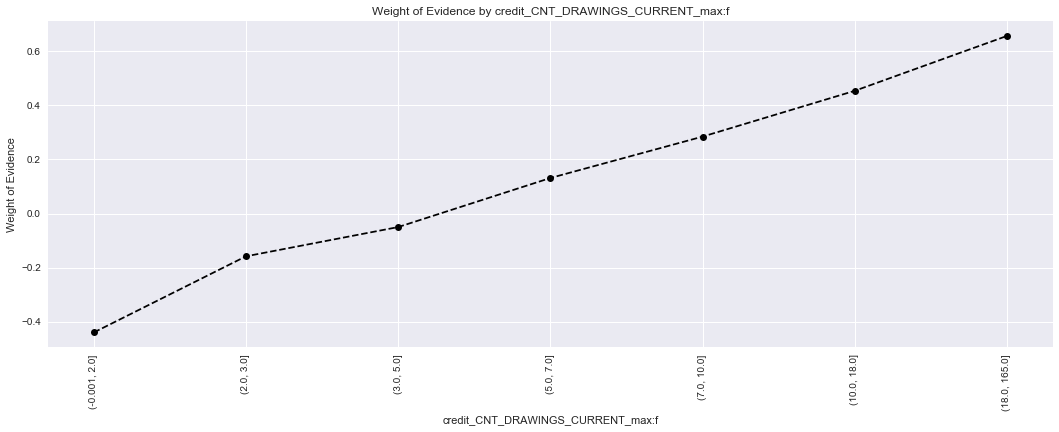

In [132]:
plot_by_woe(woe_data,90)

In [133]:
df_train["credit_CNT_DRAWINGS_CURRENT_max:missing"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_max"].isnull(),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_max:<2.0"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_max"] <= 2.0,1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_max:2.0-5.0"] = np.where((df_train["credit_CNT_DRAWINGS_CURRENT_max"] > 2.0) & (df_train["credit_CNT_DRAWINGS_CURRENT_max"] <= 5.0),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_max:5.0-10.0"] = np.where((df_train["credit_CNT_DRAWINGS_CURRENT_max"] > 5.0) & (df_train["credit_CNT_DRAWINGS_CURRENT_max"] <= 10.0),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_max:10.0-18.0"] = np.where((df_train["credit_CNT_DRAWINGS_CURRENT_max"] > 10.0) & (df_train["credit_CNT_DRAWINGS_CURRENT_max"] <= 18.0),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_max:<18.0"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_max"] > 18.0,1,0)

In [134]:
#credit_CNT_DRAWINGS_CURRENT_sum
df_temp["credit_CNT_DRAWINGS_CURRENT_sum:f"] = pd.qcut(df_temp["credit_CNT_DRAWINGS_CURRENT_sum"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_CNT_DRAWINGS_CURRENT_sum:f",df_target)

In [135]:
woe_data

,credit_CNT_DRAWINGS_CURRENT_sum:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 4.0]",36128,0.057739,0.415718,2086.0,34042.0,0.276878,0.428897,-0.437640,NaN,NaN,0.116168
1,"(4.0, 9.0]",8543,0.087089,0.098303,744.0,7799.0,0.098752,0.098260,0.004997,0.029350,0.442637,0.116168
2,"(9.0, 15.0]",7878,0.093044,0.090651,733.0,7145.0,0.097292,0.090020,0.077685,0.005955,0.072687,0.116168
3,"(15.0, 24.0]",8602,0.104162,0.098982,896.0,7706.0,0.118928,0.097088,0.202893,0.011118,0.125208,0.116168
4,"(24.0, 38.0]",8390,0.113945,0.096542,956.0,7434.0,0.126891,0.093661,0.303646,0.009783,0.100753,0.116168
5,"(38.0, 68.0]",8704,0.116958,0.100155,1018.0,7686.0,0.135121,0.096836,0.333146,0.003013,0.029501,0.116168
6,"(68.0, 2298.0]",8660,0.127136,0.099649,1101.0,7559.0,0.146138,0.095236,0.428187,0.010179,0.095041,0.116168


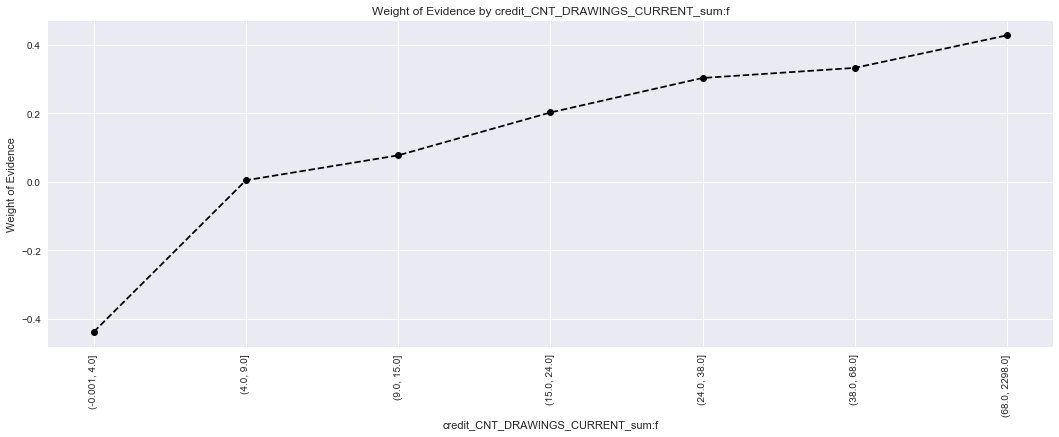

In [136]:
plot_by_woe(woe_data,90)

In [137]:
df_train["credit_CNT_DRAWINGS_CURRENT_sum:missing"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_sum"].isnull(),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_sum:<4.0"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_sum"] <= 4.0,1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_sum:4.0-24.0"] = np.where((df_train["credit_CNT_DRAWINGS_CURRENT_sum"] > 4.0) & (df_train["credit_CNT_DRAWINGS_CURRENT_sum"] <= 24.0),1,0)
df_train["credit_CNT_DRAWINGS_CURRENT_sum:>24.0"] = np.where(df_train["credit_CNT_DRAWINGS_CURRENT_sum"] > 24.0,1,0)

In [138]:
#credit_CNT_DRAWINGS_OTHER_CURRENT_count
df_temp["credit_CNT_DRAWINGS_OTHER_CURRENT_count:f"] = pd.qcut(df_temp["credit_CNT_DRAWINGS_OTHER_CURRENT_count"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_CNT_DRAWINGS_OTHER_CURRENT_count:f",df_target)

In [139]:
woe_data

,credit_CNT_DRAWINGS_OTHER_CURRENT_count:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1.0]",26212,0.055356,0.301617,1451.0,24761.0,0.192594,0.311965,-0.482310,NaN,NaN,0.187085
1,"(1.0, 8.0]",10137,0.148861,0.116645,1509.0,8628.0,0.200292,0.108705,0.611141,0.093504,1.093451,0.187085
2,"(8.0, 12.0]",7386,0.137693,0.084989,1017.0,6369.0,0.134988,0.080243,0.520122,0.011168,0.091020,0.187085
3,"(12.0, 21.0]",8898,0.118229,0.102388,1052.0,7846.0,0.139634,0.098852,0.345396,0.019464,0.174725,0.187085
4,"(21.0, 37.0]",8558,0.096752,0.098475,828.0,7730.0,0.109902,0.097391,0.120856,0.021477,0.224540,0.187085
5,"(37.0, 79.0]",8603,0.076485,0.098993,658.0,7945.0,0.087337,0.100100,-0.136386,0.020267,0.257242,0.187085
6,"(79.0, 94.0]",9432,0.062023,0.108532,585.0,8847.0,0.077648,0.111464,-0.361515,0.014462,0.225129,0.187085
7,"(94.0, 192.0]",7679,0.056518,0.088361,434.0,7245.0,0.057606,0.091280,-0.460315,0.005505,0.098800,0.187085


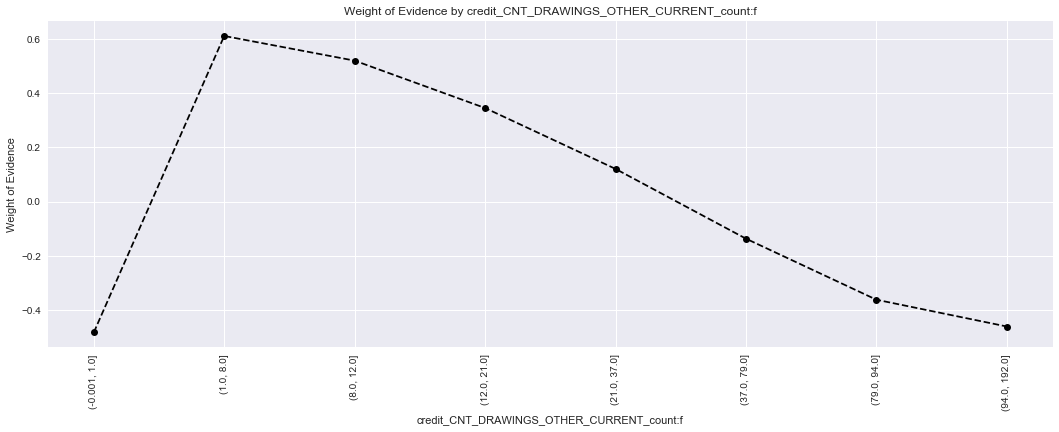

In [140]:
plot_by_woe(woe_data,90)

In [141]:
df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count:missing"] = np.where(df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count"].isnull(),1,0)
df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count:<1.0"] = np.where(df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count"] <= 1.0,1,0)
df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count:1.0-12.0"] = np.where((df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count"] > 1.0) & (df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count"] <= 12.0),1,0)
df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count:12.0-37.0"] = np.where((df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count"] > 12.0) & (df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count"] <= 37.0),1,0)
df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count:>37.0"] = np.where(df_train["credit_CNT_DRAWINGS_OTHER_CURRENT_count"] > 37.0,1,0)

In [142]:
#credit_CNT_DRAWINGS_POS_CURRENT_count
df_temp["credit_CNT_DRAWINGS_POS_CURRENT_count:f"] = pd.qcut(df_temp["credit_CNT_DRAWINGS_POS_CURRENT_count"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_CNT_DRAWINGS_POS_CURRENT_count:f",df_target)

In [143]:
woe_data

,credit_CNT_DRAWINGS_POS_CURRENT_count:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 1.0]",26212,0.055356,0.301617,1451.0,24761.0,0.192594,0.311965,-0.482310,NaN,NaN,0.187085
1,"(1.0, 8.0]",10137,0.148861,0.116645,1509.0,8628.0,0.200292,0.108705,0.611141,0.093504,1.093451,0.187085
2,"(8.0, 12.0]",7386,0.137693,0.084989,1017.0,6369.0,0.134988,0.080243,0.520122,0.011168,0.091020,0.187085
3,"(12.0, 21.0]",8898,0.118229,0.102388,1052.0,7846.0,0.139634,0.098852,0.345396,0.019464,0.174725,0.187085
4,"(21.0, 37.0]",8558,0.096752,0.098475,828.0,7730.0,0.109902,0.097391,0.120856,0.021477,0.224540,0.187085
5,"(37.0, 79.0]",8603,0.076485,0.098993,658.0,7945.0,0.087337,0.100100,-0.136386,0.020267,0.257242,0.187085
6,"(79.0, 94.0]",9432,0.062023,0.108532,585.0,8847.0,0.077648,0.111464,-0.361515,0.014462,0.225129,0.187085
7,"(94.0, 192.0]",7679,0.056518,0.088361,434.0,7245.0,0.057606,0.091280,-0.460315,0.005505,0.098800,0.187085


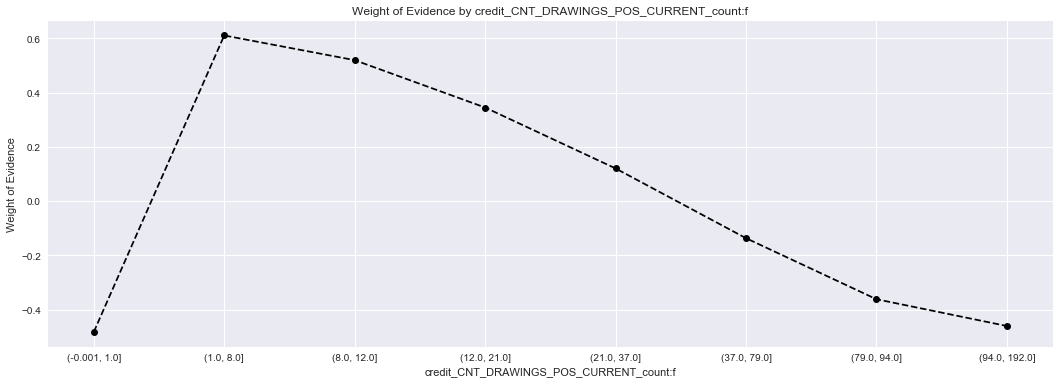

In [144]:
plot_by_woe(woe_data)

In [145]:
df_train["credit_CNT_DRAWINGS_POS_CURRENT_count:missing"] = np.where(df_train["credit_CNT_DRAWINGS_POS_CURRENT_count"].isnull(),1,0)
df_train["credit_CNT_DRAWINGS_POS_CURRENT_count:<1.0"] = np.where(df_train["credit_CNT_DRAWINGS_POS_CURRENT_count"] <= 1.0,1,0)
df_train["credit_CNT_DRAWINGS_POS_CURRENT_count:1.0-12.0"] = np.where((df_train["credit_CNT_DRAWINGS_POS_CURRENT_count"] > 1.0) & (df_train["credit_CNT_DRAWINGS_POS_CURRENT_count"] <= 12.0),1,0)
df_train["credit_CNT_DRAWINGS_POS_CURRENT_count:12.0-37.0"] = np.where((df_train["credit_CNT_DRAWINGS_POS_CURRENT_count"] > 12.0) & (df_train["credit_CNT_DRAWINGS_POS_CURRENT_count"] <= 37.0),1,0)
df_train["credit_CNT_DRAWINGS_POS_CURRENT_count:>37.0"] = np.where(df_train["credit_CNT_DRAWINGS_POS_CURRENT_count"] > 37.0,1,0)

In [146]:
#credit_CNT_DRAWINGS_POS_CURRENT_mean
df_temp["credit_CNT_DRAWINGS_POS_CURRENT_mean:f"] = pd.qcut(df_temp["credit_CNT_DRAWINGS_POS_CURRENT_mean"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"credit_CNT_DRAWINGS_POS_CURRENT_mean:f",df_target)

In [147]:
woe_data

,credit_CNT_DRAWINGS_POS_CURRENT_mean:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.167]",60917,0.069603,0.700961,4240.0,56677.0,0.562782,0.714077,-0.238098,NaN,NaN,0.104032
1,"(0.167, 1.0]",8795,0.114383,0.101202,1006.0,7789.0,0.133528,0.098134,0.307977,0.044780,0.546075,0.104032
2,"(1.0, 3.723]",8504,0.124294,0.097854,1057.0,7447.0,0.140297,0.093825,0.402330,0.009911,0.094354,0.104032
3,"(3.723, 118.25]",8689,0.141673,0.099983,1231.0,7458.0,0.163393,0.093964,0.553247,0.017379,0.150916,0.104032


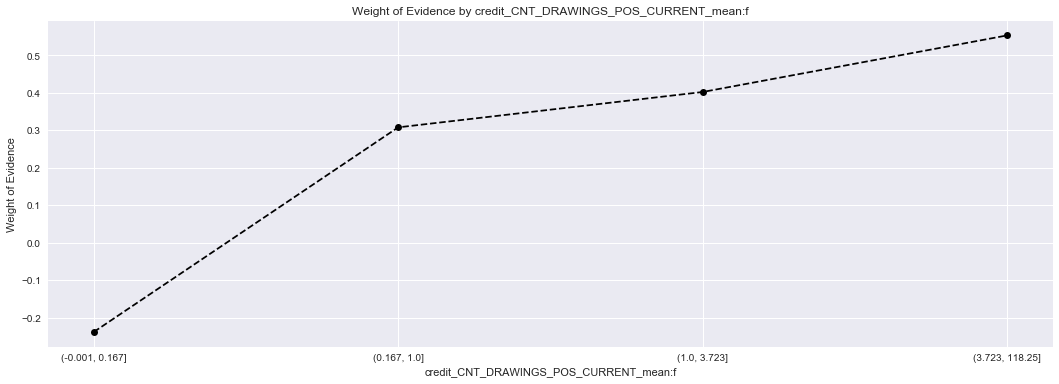

In [148]:
plot_by_woe(woe_data)

In [149]:
df_train["credit_CNT_DRAWINGS_POS_CURRENT_mean:missing"] = np.where(df_train["credit_CNT_DRAWINGS_POS_CURRENT_mean"].isnull(),1,0)
df_train["credit_CNT_DRAWINGS_POS_CURRENT_mean:<0.167"] = np.where(df_train["credit_CNT_DRAWINGS_POS_CURRENT_mean"] <= 0.167,1,0)
df_train["credit_CNT_DRAWINGS_POS_CURRENT_mean:>0.167"] = np.where(df_train["credit_CNT_DRAWINGS_POS_CURRENT_mean"] > 0.167,1,0)

## Categorical

In [150]:
categorical

array(['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'FLAG_MOBIL', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_12', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'bureau_CNT_CREDIT_PROLONG_min',
       'bureau_CNT_CREDIT_PROLONG_sum', 'bureau_CREDIT_ACTIVE_Sold_count',
       'bureau_CREDIT_CURRENCY_currency 2_count',
       'bureau_CREDIT_CURRENCY_currency 3_count',
       'bureau_CREDIT_CURRENCY_currency 4_count',
       'bureau_CREDIT_CURRENCY_currency 4_count_norm',
       'bureau_CREDIT_TYPE_Another type of loan_count',
       'bureau_CREDIT_TYPE_Car loan_count',
       'bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count',
       'bureau_CREDIT_TYPE_Interbank credit_count',
       'bureau_CREDIT_TYPE_Interbank credit_count_norm',
       

In [151]:
df_temp["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count"].nunique()

8

In [152]:
#CODE_GENDER
df_temp_ = pd.get_dummies(df_temp["CODE_GENDER"],prefix="CODE_GENDER",prefix_sep="-")
woe_data = woe_discrete(df_temp,"CODE_GENDER",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [153]:
woe_data

,CODE_GENDER,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,XNA,4,0.000000,0.000013,0.0,4.0,0.000000,0.000014,-inf,NaN,NaN,inf
1,F,202448,0.069993,0.658344,14170.0,188278.0,0.570796,0.666032,-0.154307,0.069993,inf,inf
2,M,105059,0.101419,0.341643,10655.0,94404.0,0.429204,0.333954,0.250931,0.031426,0.405238,inf


In [154]:
df_train["CODE_GENDER:M"] = df_temp_["CODE_GENDER-M"]
df_train["CODE_GENDER:F-XNA"] = sum([df_temp_["CODE_GENDER-F"],df_temp_["CODE_GENDER-XNA"]])

In [155]:
#NAME_INCOME_TYPE
df_temp_ = pd.get_dummies(df_temp["NAME_INCOME_TYPE"], prefix="NAME_INCOME_TYPE", prefix_sep="-")
woe_data = woe_discrete(df_temp,"NAME_INCOME_TYPE",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [156]:
woe_data

,NAME_INCOME_TYPE,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Businessman,10,0.000000,0.000033,0.0,10.0,0.000000,0.000035,-inf,NaN,NaN,inf
1,Student,18,0.000000,0.000059,0.0,18.0,0.000000,0.000064,-inf,0.000000,NaN,inf
2,Pensioner,55362,0.053864,0.180033,2982.0,52380.0,0.120121,0.185294,-0.433445,0.053864,inf,inf
3,State servant,21703,0.057550,0.070576,1249.0,20454.0,0.050312,0.072356,-0.363350,0.003686,0.070095,inf
4,Commercial associate,71617,0.074843,0.232892,5360.0,66257.0,0.215911,0.234384,-0.082092,0.017293,0.281258,inf
5,Working,158774,0.095885,0.516320,15224.0,143550.0,0.613253,0.507807,0.188675,0.021042,0.270767,inf
6,Unemployed,22,0.363636,0.000072,8.0,14.0,0.000322,0.000050,1.872870,0.267752,1.684194,inf
7,Maternity leave,5,0.400000,0.000016,2.0,3.0,0.000081,0.000011,2.027020,0.036364,0.154151,inf


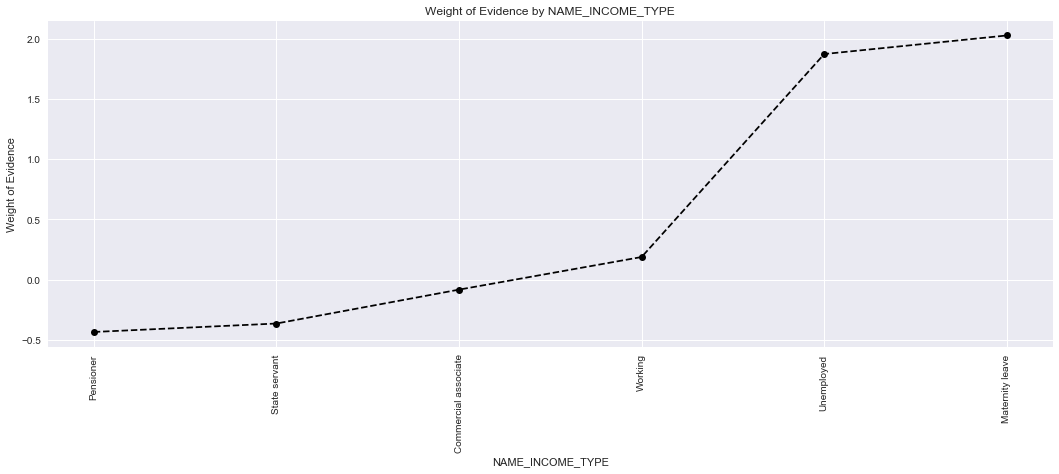

In [157]:
plot_by_woe(woe_data,90)

In [158]:
df_train["NAME_INCOME_TYPE:Maternity leave-Unemployed-Working"] = sum([df_temp_["NAME_INCOME_TYPE-Maternity leave"],df_temp_["NAME_INCOME_TYPE-Unemployed"],df_temp_["NAME_INCOME_TYPE-Working"]])
df_train["NAME_INCOME_TYPE:Commercial associate"] = df_temp_["NAME_INCOME_TYPE-Commercial associate"]
df_train["NAME_INCOME_TYPE:State servant-Pensioner-Businessman-Servant"] = sum([df_temp_["NAME_INCOME_TYPE-State servant"],df_temp_["NAME_INCOME_TYPE-Pensioner"],df_temp_["NAME_INCOME_TYPE-Businessman"],df_temp_["NAME_INCOME_TYPE-Student"]])

In [159]:
#NAME_FAMILY_STATUS
df_temp_ = pd.get_dummies(df_temp["NAME_FAMILY_STATUS"],prefix="NAME_FAMILY_STATUS",prefix_sep="-")
woe_data = woe_discrete(df_temp,"NAME_FAMILY_STATUS",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [160]:
woe_data

,NAME_FAMILY_STATUS,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Unknown,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,NaN,NaN,inf
1,Widow,16088,0.058242,0.052317,937.0,15151.0,0.037744,0.053597,-0.350653,0.058242,inf,inf
2,Married,196432,0.075599,0.638780,14850.0,181582.0,0.598187,0.642345,-0.071222,0.017357,0.279431,inf
3,Separated,19770,0.081942,0.064290,1620.0,18150.0,0.065257,0.064206,0.016241,0.006344,0.087463,inf
4,Single / not married,45444,0.098077,0.147780,4457.0,40987.0,0.179537,0.144991,0.213706,0.016134,0.197465,inf
5,Civil marriage,29775,0.099446,0.096826,2961.0,26814.0,0.119275,0.094854,0.229088,0.001369,0.015382,inf


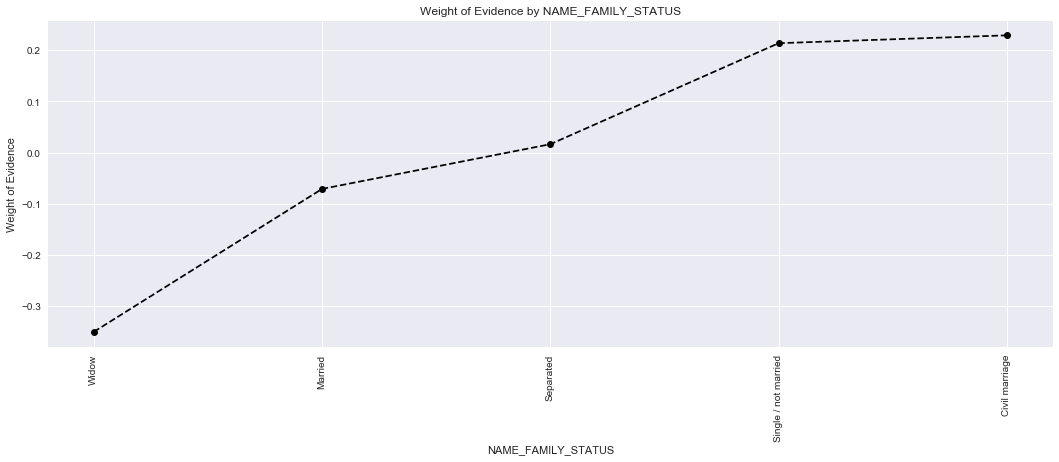

In [161]:
plot_by_woe(woe_data,90)

In [162]:
df_train["NAME_FAMILY_STATUS:Civil marriage-Single-Separated"] = sum([df_temp_["NAME_FAMILY_STATUS-Civil marriage"],df_temp_["NAME_FAMILY_STATUS-Single / not married"],df_temp_["NAME_FAMILY_STATUS-Separated"]])
df_train["NAME_FAMILY_STATUS:Married-Widow-Unknown"] = sum([df_temp_["NAME_FAMILY_STATUS-Married"],df_temp_["NAME_FAMILY_STATUS-Widow"],df_temp_["NAME_FAMILY_STATUS-Unknown"]])

In [163]:
#FLAG_MOBIL - Not useful

In [164]:
# DEF_30_CNT_SOCIAL_CIRCLE
df_temp_ = pd.get_dummies(df_temp["DEF_30_CNT_SOCIAL_CIRCLE"], prefix="DEF_30_CNT_SOCIAL_CIRCLE",prefix_sep="-")
woe_data = woe_discrete(df_temp,"DEF_30_CNT_SOCIAL_CIRCLE",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [165]:
woe_data

,DEF_30_CNT_SOCIAL_CIRCLE,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,7.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,NaN,NaN,inf
1,8.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,34.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,0.0,272345,0.077600,0.885643,21134.0,251211.0,0.851319,0.888657,-0.042925,0.077600,inf,inf
4,6.0,11,0.090909,0.000036,1.0,10.0,0.000040,0.000035,0.129900,0.013309,0.172825,inf
5,1.0,28328,0.101454,0.092120,2874.0,25454.0,0.115770,0.090043,0.251317,0.010545,0.121417,inf
6,2.0,5323,0.116476,0.017310,620.0,4703.0,0.024975,0.016637,0.406249,0.015021,0.154932,inf
7,3.0,1192,0.128356,0.003876,153.0,1039.0,0.006163,0.003675,0.516909,0.011880,0.110660,inf
8,4.0,253,0.138340,0.000823,35.0,218.0,0.001410,0.000771,0.603339,0.009984,0.086429,inf
9,5.0,56,0.142857,0.000182,8.0,48.0,0.000322,0.000170,0.640726,0.004517,0.037388,inf


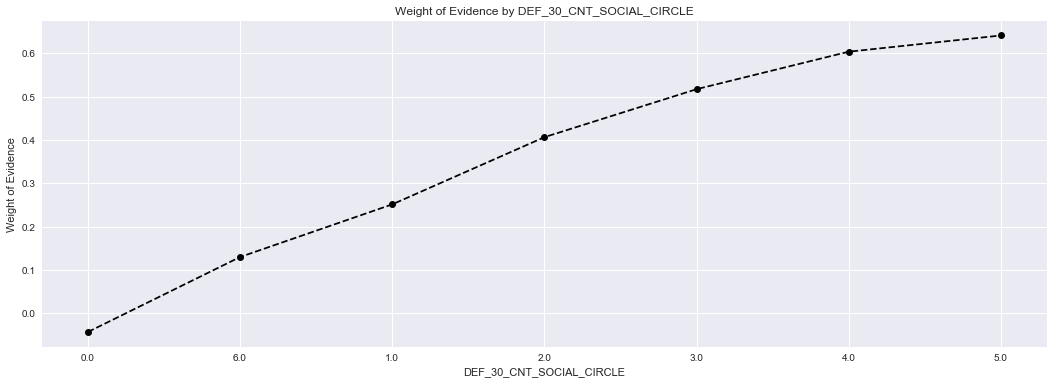

In [166]:
plot_by_woe(woe_data)

In [167]:
df_train["DEF_30_CNT_SOCIAL_CIRCLE:5-4-3-2-1-6"] = sum([df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-5.0"],df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-4.0"],df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-3.0"],df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-2.0"],df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-1.0"],df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-6.0"]])
df_train["DEF_30_CNT_SOCIAL_CIRCLE:0-7-8-34"] = sum([df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-0.0"],df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-7.0"],df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-8.0"],df_temp_["DEF_30_CNT_SOCIAL_CIRCLE-34.0"]])

In [168]:
#DEF_60_CNT_SOCIAL_CIRCLE
df_temp_ = pd.get_dummies(df_temp["DEF_60_CNT_SOCIAL_CIRCLE"],prefix="DEF_60_CNT_SOCIAL_CIRCLE",prefix_sep="-")
woe_data = woe_discrete(df_temp,"DEF_60_CNT_SOCIAL_CIRCLE",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [169]:
woe_data

,DEF_60_CNT_SOCIAL_CIRCLE,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,3,0.000000,0.000010,0.0,3.0,0.000000,0.000011,-inf,NaN,NaN,inf
1,7.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,24.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,0.0,281742,0.078192,0.916201,22030.0,259712.0,0.887412,0.918730,-0.034683,0.078192,inf,inf
4,1.0,21841,0.105169,0.071025,2297.0,19544.0,0.092528,0.069137,0.291421,0.026977,0.326104,inf
5,4.0,135,0.111111,0.000439,15.0,120.0,0.000604,0.000424,0.353044,0.005942,0.061623,inf
6,2.0,3170,0.121451,0.010309,385.0,2785.0,0.015509,0.009852,0.453726,0.010340,0.100682,inf
7,5.0,20,0.150000,0.000065,3.0,17.0,0.000121,0.000060,0.697884,0.028549,0.244159,inf
8,3.0,598,0.158863,0.001945,95.0,503.0,0.003827,0.001779,0.765772,0.008863,0.067888,inf


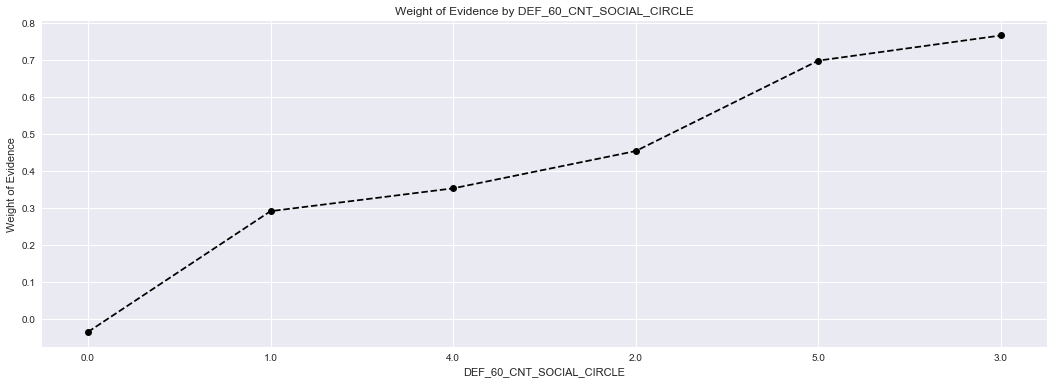

In [170]:
plot_by_woe(woe_data)

In [171]:
df_train["DEF_60_CNT_SOCIAL_CIRCLE:3-5-2-4-1"] = sum([df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-3.0"],df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-5.0"],df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-2.0"],df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-4.0"],df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-1.0"]])
df_train["DEF_60_CNT_SOCIAL_CIRCLE:0-6-7-24"] = sum([df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-0.0"],df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-6.0"],df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-7.0"],df_temp_["DEF_60_CNT_SOCIAL_CIRCLE-24.0"]])

In [172]:
#FLAG_DOCUMENT_4 - No use
df_temp_ = pd.get_dummies(df_temp["FLAG_DOCUMENT_4"],prefix="FLAG_DOCUMENT_4",prefix_sep="-")
woe_data = woe_discrete(df_temp,"FLAG_DOCUMENT_4",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [173]:
woe_data

,FLAG_DOCUMENT_4,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,25,0.000000,0.000081,0.0,25.0,0.0,0.000088,-inf,NaN,NaN,inf
1,0,307486,0.080735,0.999919,24825.0,282661.0,1.0,0.999912,0.000088,0.080735,inf,inf


In [174]:
# FLAG_DOCUMENT_10 - No Use
woe_data = woe_discrete(df_temp,"FLAG_DOCUMENT_10",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [175]:
woe_data

,FLAG_DOCUMENT_10,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,7,0.000000,0.000023,0.0,7.0,0.0,0.000025,-inf,NaN,NaN,inf
1,0,307504,0.080731,0.999977,24825.0,282679.0,1.0,0.999975,0.000025,0.080731,inf,inf


In [176]:
# AMT_REQ_CREDIT_BUREAU_HOUR
df_temp_ = pd.get_dummies(df_temp["AMT_REQ_CREDIT_BUREAU_HOUR"],prefix="AMT_REQ_CREDIT_BUREAU_HOUR", prefix_sep="-")
woe_data = woe_discrete(df_temp,"AMT_REQ_CREDIT_BUREAU_HOUR",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [177]:
woe_data

,AMT_REQ_CREDIT_BUREAU_HOUR,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,3.0,9,0.000000,0.000029,0.0,9.0,0.000000,0.000032,-inf,NaN,NaN,inf
1,4.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,1.0,1560,0.080128,0.005073,125.0,1435.0,0.005035,0.005076,-0.008121,0.080128,inf,inf
3,0.0,305885,0.080730,0.994712,24694.0,281191.0,0.994723,0.994711,0.000012,0.000601,0.008133,inf
4,2.0,56,0.107143,0.000182,6.0,50.0,0.000242,0.000177,0.312222,0.026413,0.312210,inf


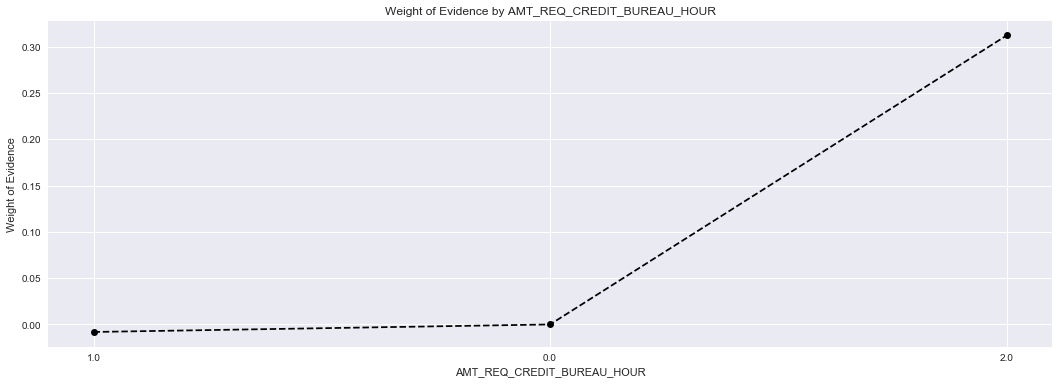

In [178]:
plot_by_woe(woe_data)

In [179]:
df_train["AMT_REQ_CREDIT_BUREAU_HOUR:0"] = df_temp_["AMT_REQ_CREDIT_BUREAU_HOUR-0.0"]
df_train["AMT_REQ_CREDIT_BUREAU_HOUR:others"] = sum([df_temp_["AMT_REQ_CREDIT_BUREAU_HOUR-1.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_HOUR-2.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_HOUR-3.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_HOUR-4.0"]])

In [180]:
#AMT_REQ_CREDIT_BUREAU_DAY
df_temp_ = pd.get_dummies(df_temp["AMT_REQ_CREDIT_BUREAU_DAY"],prefix="AMT_REQ_CREDIT_BUREAU_DAY",prefix_sep="-")
woe_data = woe_discrete(df_temp,"AMT_REQ_CREDIT_BUREAU_DAY",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [181]:
woe_data

,AMT_REQ_CREDIT_BUREAU_DAY,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,5.0,9,0.000000,0.000029,0.0,9.0,0.000000,0.000032,-inf,NaN,NaN,inf
1,6.0,8,0.000000,0.000026,0.0,8.0,0.000000,0.000028,-inf,0.000000,NaN,inf
2,8.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,9.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,0.000000,NaN,inf
4,3.0,45,0.044444,0.000146,2.0,43.0,0.000081,0.000152,-0.635567,0.044444,inf,inf
5,0.0,306022,0.080661,0.995158,24684.0,281338.0,0.994320,0.995231,-0.000916,0.036216,0.634651,inf
6,1.0,1292,0.096749,0.004201,125.0,1167.0,0.005035,0.004128,0.198608,0.016088,0.199524,inf
7,2.0,106,0.103774,0.000345,11.0,95.0,0.000443,0.000336,0.276504,0.007024,0.077896,inf
8,4.0,26,0.115385,0.000085,3.0,23.0,0.000121,0.000081,0.395604,0.011611,0.119100,inf


In [182]:
df_train["AAMT_REQ_CREDIT_BUREAU_DAY:0"] = df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-0.0"]
df_train["AMT_REQ_CREDIT_BUREAU_DAY:others"] = sum([df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-3.0"],
                                                    df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-5.0"],
                                                    df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-6.0"],
                                                    df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-8.0"],
                                                    df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-9.0"],
                                                    df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-4.0"],
                                                    df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-2.0"],
                                                    df_temp_["AMT_REQ_CREDIT_BUREAU_DAY-1.0"]])                                                         

In [183]:
#AMT_REQ_CREDIT_BUREAU_WEEK
df_temp_ = pd.get_dummies(df_temp["AMT_REQ_CREDIT_BUREAU_WEEK"],prefix="AMT_REQ_CREDIT_BUREAU_WEEK",prefix_sep="-")
woe_data = woe_discrete(df_temp,"AMT_REQ_CREDIT_BUREAU_WEEK",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [184]:
woe_data

,AMT_REQ_CREDIT_BUREAU_WEEK,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,7.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,NaN,NaN,inf
1,8.0,5,0.000000,0.000016,0.0,5.0,0.000000,0.000018,-inf,0.000000,NaN,inf
2,6.0,20,0.050000,0.000065,1.0,19.0,0.000040,0.000067,-0.511953,0.050000,inf,inf
3,3.0,58,0.068966,0.000189,4.0,54.0,0.000161,0.000191,-0.170204,0.018966,0.341749,inf
4,1.0,8208,0.077729,0.026692,638.0,7570.0,0.025700,0.026779,-0.041125,0.008764,0.129080,inf
5,0.0,298975,0.080799,0.972242,24157.0,274818.0,0.973092,0.972167,0.000951,0.003070,0.042075,inf
6,5.0,10,0.100000,0.000033,1.0,9.0,0.000040,0.000032,0.235261,0.019201,0.234310,inf
7,2.0,199,0.100503,0.000647,20.0,179.0,0.000806,0.000633,0.240832,0.000503,0.005571,inf
8,4.0,34,0.117647,0.000111,4.0,30.0,0.000161,0.000106,0.417583,0.017145,0.176751,inf


In [185]:
df_train["AMT_REQ_CREDIT_BUREAU_WEEK:0"] = df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-0.0"]
df_train["AMT_REQ_CREDIT_BUREAU_WEEK:others"] = sum([df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-4.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-2.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-5.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-1.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-3.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-6.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-7.0"],
                                                     df_temp_["AMT_REQ_CREDIT_BUREAU_WEEK-8.0"]])

In [186]:
#AMT_REQ_CREDIT_BUREAU_QRT
df_temp_ = pd.get_dummies(df_temp["AMT_REQ_CREDIT_BUREAU_QRT"],prefix="AMT_REQ_CREDIT_BUREAU_QRT",prefix_sep="-")
woe_data = woe_discrete(df_temp,"AMT_REQ_CREDIT_BUREAU_QRT",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [187]:
woe_data

,AMT_REQ_CREDIT_BUREAU_QRT,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,8.0,7,0.000000,0.000023,0.0,7.0,0.000000,0.000025,-inf,NaN,NaN,inf
1,261.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,1.0,33862,0.065767,0.110116,2227.0,31635.0,0.089708,0.111909,-0.221123,0.065767,inf,inf
3,3.0,1717,0.073384,0.005584,126.0,1591.0,0.005076,0.005628,-0.103351,0.007617,0.117773,inf
4,0.0,256936,0.082499,0.835534,21197.0,235739.0,0.853857,0.833925,0.023620,0.009115,0.126971,inf
5,2.0,14412,0.083472,0.046867,1203.0,13209.0,0.048459,0.046727,0.036406,0.000973,0.012786,inf
6,5.0,64,0.093750,0.000208,6.0,58.0,0.000242,0.000205,0.163802,0.010278,0.127396,inf
7,4.0,476,0.119748,0.001548,57.0,419.0,0.002296,0.001482,0.437666,0.025998,0.273864,inf
8,7.0,7,0.142857,0.000023,1.0,6.0,0.000040,0.000021,0.640726,0.023109,0.203060,inf
9,6.0,28,0.250000,0.000091,7.0,21.0,0.000282,0.000074,1.333873,0.107143,0.693147,inf


In [188]:
df_train["AMT_REQ_CREDIT_BUREAU_QRT:0"] = df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-0.0"]
df_train["AMT_REQ_CREDIT_BUREAU_QRT:others"] = sum([df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-1.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-19.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-2.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-261.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-3.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-4.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-5.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-6.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-7.0"],
                                                   df_temp_["AMT_REQ_CREDIT_BUREAU_QRT-8.0"]])

In [189]:
#bureau_CNT_CREDIT_PROLONG_sum
df_temp_ = pd.get_dummies(df_temp["bureau_CNT_CREDIT_PROLONG_sum"],prefix="bureau_CNT_CREDIT_PROLONG_sum",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CNT_CREDIT_PROLONG_sum",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [190]:
woe_data

,bureau_CNT_CREDIT_PROLONG_sum,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,5.0,29,0.000000,0.000094,0.0,29.0,0.000000,0.000103,-inf,NaN,NaN,inf
1,7.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,8.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,9.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,0.000000,NaN,inf
4,4.0,61,0.049180,0.000198,3.0,58.0,0.000121,0.000205,-0.529345,0.049180,inf,inf
5,3.0,256,0.054688,0.000832,14.0,242.0,0.000564,0.000856,-0.417395,0.005507,0.111950,inf
6,0.0,299003,0.080548,0.972333,24084.0,274919.0,0.970151,0.972524,-0.002443,0.025860,0.414952,inf
7,2.0,1282,0.087363,0.004169,112.0,1170.0,0.004512,0.004139,0.086225,0.006816,0.088669,inf
8,1.0,6869,0.088950,0.022337,611.0,6258.0,0.024612,0.022138,0.105967,0.001587,0.019741,inf
9,6.0,7,0.142857,0.000023,1.0,6.0,0.000040,0.000021,0.640726,0.053907,0.534759,inf


In [191]:
df_train["bureau_CNT_CREDIT_PROLONG_sum:6-1-2"] = sum([df_temp_["bureau_CNT_CREDIT_PROLONG_sum-6.0"],
                                                      df_temp_["bureau_CNT_CREDIT_PROLONG_sum-1.0"],
                                                      df_temp_["bureau_CNT_CREDIT_PROLONG_sum-2.0"]])
df_train["bureau_CNT_CREDIT_PROLONG_sum:0"] = df_temp_["bureau_CNT_CREDIT_PROLONG_sum-0.0"]
df_train["bureau_CNT_CREDIT_PROLONG_sum:others"] = sum([df_temp_["bureau_CNT_CREDIT_PROLONG_sum-3.0"],
                                                       df_temp_["bureau_CNT_CREDIT_PROLONG_sum-4.0"],
                                                       df_temp_["bureau_CNT_CREDIT_PROLONG_sum-5.0"],
                                                       df_temp_["bureau_CNT_CREDIT_PROLONG_sum-7.0"],
                                                       df_temp_["bureau_CNT_CREDIT_PROLONG_sum-8.0"],
                                                       df_temp_["bureau_CNT_CREDIT_PROLONG_sum-9.0"]])

In [192]:
#bureau_CREDIT_ACTIVE_Sold_count
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_ACTIVE_Sold_count"],prefix="bureau_CREDIT_ACTIVE_Sold_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CREDIT_ACTIVE_Sold_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [193]:
woe_data

,bureau_CREDIT_ACTIVE_Sold_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,4.0,5,0.000000,0.000016,0.0,5.0,0.000000,0.000018,-inf,NaN,NaN,inf
1,5.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,0.000000,NaN,inf
2,6.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,9.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
4,3.0,29,0.034483,0.000094,1.0,28.0,0.000040,0.000099,-0.899719,0.034483,inf,inf
5,0.0,302285,0.080355,0.983005,24290.0,277995.0,0.978449,0.983406,-0.005053,0.045872,0.894666,inf
6,2.0,333,0.102102,0.001083,34.0,299.0,0.001370,0.001058,0.258402,0.021747,0.263455,inf
7,1.0,4855,0.102987,0.015788,500.0,4355.0,0.020141,0.015406,0.268014,0.000885,0.009611,inf


In [194]:
df_train["bureau_CREDIT_ACTIVE_Sold_count:1-2"] = sum([df_temp_["bureau_CREDIT_ACTIVE_Sold_count-1.0"],
                                                      df_temp_["bureau_CREDIT_ACTIVE_Sold_count-2.0"]])
df_train["bureau_CREDIT_ACTIVE_Sold_count:0"] = df_temp_["bureau_CREDIT_ACTIVE_Sold_count-0.0"]
df_train["bureau_CREDIT_ACTIVE_Sold_count:others"] = sum([df_temp_["bureau_CREDIT_ACTIVE_Sold_count-3.0"],
                                                         df_temp_["bureau_CREDIT_ACTIVE_Sold_count-4.0"],
                                                         df_temp_["bureau_CREDIT_ACTIVE_Sold_count-5.0"],
                                                         df_temp_["bureau_CREDIT_ACTIVE_Sold_count-6.0"],
                                                         df_temp_["bureau_CREDIT_ACTIVE_Sold_count-9.0"]])

In [195]:
#bureau_CREDIT_CURRENCY_currency 2_count
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_CURRENCY_currency 2_count"],prefix="bureau_CREDIT_CURRENCY_currency 2_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CREDIT_CURRENCY_currency 2_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [196]:
woe_data

,bureau_CREDIT_CURRENCY_currency 2_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,4.0,6,0.000000,0.000020,0.0,6.0,0.000000,0.000021,-inf,NaN,NaN,inf
1,5.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,0.000000,NaN,inf
2,6.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,0.000000,NaN,inf
3,2.0,116,0.025862,0.000377,3.0,113.0,0.000121,0.000400,-1.196290,0.025862,inf,inf
4,3.0,37,0.054054,0.000120,2.0,35.0,0.000081,0.000124,-0.429715,0.028192,0.766575,inf
5,1.0,683,0.054173,0.002221,37.0,646.0,0.001490,0.002285,-0.427396,0.000119,0.002319,inf
6,0.0,306665,0.080815,0.997249,24783.0,281882.0,0.998308,0.997156,0.001155,0.026642,0.428551,inf


In [197]:
df_train["bureau_CREDIT_CURRENCY_currency 2_count:0"] = df_temp_["bureau_CREDIT_CURRENCY_currency 2_count-0.0"]
df_train["bureau_CREDIT_CURRENCY_currency 2_count:others"] = sum([df_temp_["bureau_CREDIT_CURRENCY_currency 2_count-1.0"],
                                                                 df_temp_["bureau_CREDIT_CURRENCY_currency 2_count-2.0"],
                                                                 df_temp_["bureau_CREDIT_CURRENCY_currency 2_count-3.0"],
                                                                 df_temp_["bureau_CREDIT_CURRENCY_currency 2_count-4.0"],
                                                                 df_temp_["bureau_CREDIT_CURRENCY_currency 2_count-5.0"],
                                                                 df_temp_["bureau_CREDIT_CURRENCY_currency 2_count-6.0"]])

In [198]:
#bureau_CREDIT_CURRENCY_currency 3_count
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_CURRENCY_currency 3_count"],prefix="bureau_CREDIT_CURRENCY_currency 3_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CREDIT_CURRENCY_currency 3_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [199]:
woe_data

,bureau_CREDIT_CURRENCY_currency 3_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,3.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,NaN,NaN,inf
1,0.0,307376,0.080719,0.999561,24811.0,282565.0,0.999436,0.999572,-0.000136,0.080719,inf,inf
2,1.0,121,0.090909,0.000393,11.0,110.0,0.000443,0.000389,0.129900,0.010190,0.130036,inf
3,2.0,13,0.230769,0.000042,3.0,10.0,0.000121,0.000035,1.228513,0.139860,1.098612,inf


In [200]:
df_train["bureau_CREDIT_CURRENCY_currency 3_count:0"] = df_temp_["bureau_CREDIT_CURRENCY_currency 3_count-0.0"]
df_train["bureau_CREDIT_CURRENCY_currency 3_count:others"] = sum([df_temp_["bureau_CREDIT_CURRENCY_currency 3_count-1.0"],
                                                                 df_temp_["bureau_CREDIT_CURRENCY_currency 3_count-2.0"],
                                                                 df_temp_["bureau_CREDIT_CURRENCY_currency 3_count-3.0"]])

In [201]:
#bureau_CREDIT_CURRENCY_currency 4_count -not
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_CURRENCY_currency 4_count"],prefix="bureau_CREDIT_CURRENCY_currency 4_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CREDIT_CURRENCY_currency 4_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [202]:
woe_data

,bureau_CREDIT_CURRENCY_currency 4_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,9,0.000000,0.000029,0.0,9.0,0.0,0.000032,-inf,NaN,NaN,inf
1,0.0,307502,0.080731,0.999971,24825.0,282677.0,1.0,0.999968,0.000032,0.080731,inf,inf


In [203]:
#bureau_CREDIT_CURRENCY_currency 4_count_norm not usefull
woe_data = woe_discrete(df_temp,"bureau_CREDIT_CURRENCY_currency 4_count_norm",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [204]:
woe_data

,bureau_CREDIT_CURRENCY_currency 4_count_norm,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.05554,1,0.000000,0.000003,0.0,1.0,0.0,0.000004,-inf,NaN,NaN,inf
1,0.11110,1,0.000000,0.000003,0.0,1.0,0.0,0.000004,-inf,0.000000,NaN,inf
2,0.12500,1,0.000000,0.000003,0.0,1.0,0.0,0.000004,-inf,0.000000,NaN,inf
3,0.14280,2,0.000000,0.000007,0.0,2.0,0.0,0.000007,-inf,0.000000,NaN,inf
4,0.25000,3,0.000000,0.000010,0.0,3.0,0.0,0.000011,-inf,0.000000,NaN,inf
5,0.50000,1,0.000000,0.000003,0.0,1.0,0.0,0.000004,-inf,0.000000,NaN,inf
6,0.00000,307502,0.080731,0.999971,24825.0,282677.0,1.0,0.999968,0.000032,0.080731,inf,inf


In [205]:
#bureau_CREDIT_CURRENCY_currency 4_count_norm cont
df_temp["bureau_CREDIT_CURRENCY_currency 4_count_norm:f"]=pd.qcut(df_temp["bureau_CREDIT_CURRENCY_currency 4_count_norm"],10,duplicates='drop')
woe_data = woe_ordered_continuous(df_temp,"bureau_CREDIT_CURRENCY_currency 4_count_norm:f",df_target)

In [206]:
woe_data

,bureau_CREDIT_CURRENCY_currency 4_count_norm:f,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.5]",307511,0.080729,1.0,24825.0,282686.0,1.0,1.0,0.0,NaN,NaN,0.0


In [207]:
#bureau_CREDIT_TYPE_Another type of loan_count
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_TYPE_Another type of loan_count"],prefix="bureau_CREDIT_TYPE_Another type of loan_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CREDIT_TYPE_Another type of loan_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [208]:
woe_data

,bureau_CREDIT_TYPE_Another type of loan_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,3.0,3,0.000000,0.000010,0.0,3.0,0.000000,0.000011,-inf,NaN,NaN,inf
1,4.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,0.000000,NaN,inf
2,2.0,29,0.034483,0.000094,1.0,28.0,0.000040,0.000099,-0.899719,0.034483,inf,inf
3,1.0,779,0.075738,0.002533,59.0,720.0,0.002377,0.002547,-0.069228,0.041255,0.830491,inf
4,0.0,306698,0.080747,0.997356,24765.0,281933.0,0.997583,0.997336,0.000247,0.005009,0.069476,inf


In [209]:
df_train["bureau_CREDIT_TYPE_Another type of loan_count:0"] = df_temp_["bureau_CREDIT_TYPE_Another type of loan_count-0.0"]
df_train["bureau_CREDIT_TYPE_Another type of loan_count:others"] = sum([df_temp_["bureau_CREDIT_TYPE_Another type of loan_count-1.0"],
                                                                       df_temp_["bureau_CREDIT_TYPE_Another type of loan_count-2.0"],
                                                                       df_temp_["bureau_CREDIT_TYPE_Another type of loan_count-3.0"],
                                                                       df_temp_["bureau_CREDIT_TYPE_Another type of loan_count-4.0"]])

In [210]:
#bureau_CREDIT_TYPE_Car loan_count
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_TYPE_Car loan_count"],prefix="bureau_CREDIT_TYPE_Car loan_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CREDIT_TYPE_Car loan_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [211]:
woe_data

,bureau_CREDIT_TYPE_Car loan_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,5,0.000000,0.000016,0.0,5.0,0.000000,0.000018,-inf,NaN,NaN,inf
1,7.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,0.000000,NaN,inf
2,8.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,9.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
4,4.0,103,0.009709,0.000335,1.0,102.0,0.000040,0.000361,-2.192487,0.009709,inf,inf
5,5.0,29,0.034483,0.000094,1.0,28.0,0.000040,0.000099,-0.899719,0.024774,1.292768,inf
6,3.0,520,0.042308,0.001691,22.0,498.0,0.000886,0.001762,-0.687072,0.007825,0.212647,inf
7,2.0,2665,0.052533,0.008666,140.0,2525.0,0.005639,0.008932,-0.459868,0.010225,0.227204,inf
8,1.0,16249,0.059634,0.052840,969.0,15280.0,0.039033,0.054053,-0.325550,0.007102,0.134318,inf
9,0.0,287936,0.082282,0.936344,23692.0,264244.0,0.954361,0.934762,0.020750,0.022648,0.346300,inf


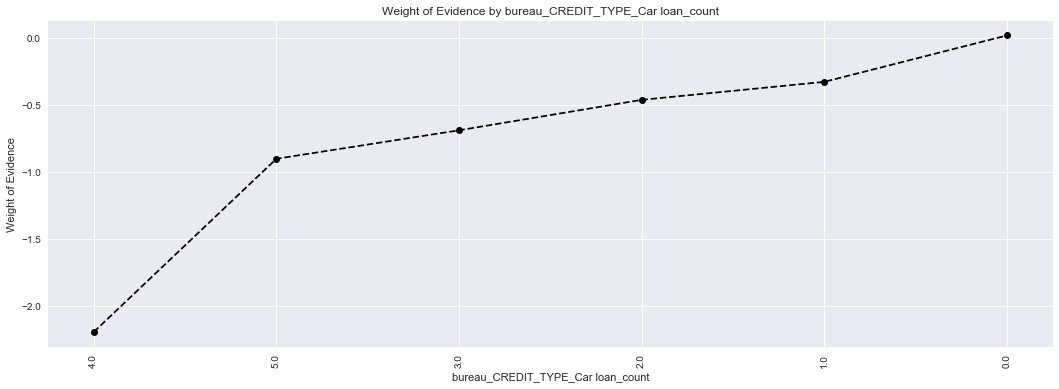

In [212]:
plot_by_woe(woe_data,90)

In [213]:
df_train["bureau_CREDIT_TYPE_Car loan_count:0"] = df_temp_["bureau_CREDIT_TYPE_Car loan_count-0.0"]
df_train["bureau_CREDIT_TYPE_Car loan_count:1"] = df_temp_["bureau_CREDIT_TYPE_Car loan_count-1.0"]
df_train["bureau_CREDIT_TYPE_Car loan_count:others"] = sum([df_temp_["bureau_CREDIT_TYPE_Car loan_count-2.0"],
                                                           df_temp_["bureau_CREDIT_TYPE_Car loan_count-3.0"],
                                                           df_temp_["bureau_CREDIT_TYPE_Car loan_count-4.0"],
                                                           df_temp_["bureau_CREDIT_TYPE_Car loan_count-5.0"],
                                                           df_temp_["bureau_CREDIT_TYPE_Car loan_count-6.0"],
                                                           df_temp_["bureau_CREDIT_TYPE_Car loan_count-7.0"],
                                                           df_temp_["bureau_CREDIT_TYPE_Car loan_count-8.0"],
                                                           df_temp_["bureau_CREDIT_TYPE_Car loan_count-9.0"]])

In [214]:
#bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count +not useful
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count"],prefix="bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [215]:
woe_data

,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2.0,3,0.000000,0.000010,0.0,3.0,0.00000,0.000011,-inf,NaN,NaN,inf
1,1.0,17,0.058824,0.000055,1.0,16.0,0.00004,0.000057,-0.340103,0.058824,inf,inf
2,0.0,307491,0.080731,0.999935,24824.0,282667.0,0.99996,0.999933,0.000027,0.021907,0.34013,inf


In [216]:
#bureau_CREDIT_TYPE_Interbank credit_count not useful
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_TYPE_Interbank credit_count"],prefix="bureau_CREDIT_TYPE_Interbank credit_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"bureau_CREDIT_TYPE_Interbank credit_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [217]:
woe_data

,bureau_CREDIT_TYPE_Interbank credit_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,1,0.000000,0.000003,0.0,1.0,0.0,0.000004,-inf,NaN,NaN,inf
1,0.0,307510,0.080729,0.999997,24825.0,282685.0,1.0,0.999996,0.000004,0.080729,inf,inf


In [218]:
# bureau_CREDIT_TYPE_Mobile operator loan_count not useful
df_temp_ = pd.get_dummies(df_temp["bureau_CREDIT_TYPE_Mobile operator loan_count"],prefix="bureau_CREDIT_TYPE_Mobile operator loan_count",prefix_sep="-")
woe_data = woe_ordered_continuous(df_temp,"bureau_CREDIT_TYPE_Mobile operator loan_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [219]:
woe_data

,bureau_CREDIT_TYPE_Mobile operator loan_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,307510,0.080729,0.999997,24825.0,282685.0,1.0,0.999996,0.000004,NaN,NaN,inf
1,1.0,1,0.000000,0.000003,0.0,1.0,0.0,0.000004,-inf,0.080729,inf,inf


In [220]:
#installments_payments_NUM_INSTALMENT_VERSION_min
df_temp_ = pd.get_dummies(df_temp["installments_payments_NUM_INSTALMENT_VERSION_min"],prefix="installments_payments_NUM_INSTALMENT_VERSION_min",prefix_sep="-")
woe_data = woe_discrete(df_temp,"installments_payments_NUM_INSTALMENT_VERSION_min",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [221]:
woe_data

,installments_payments_NUM_INSTALMENT_VERSION_min,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,3.0,7,0.000000,0.000023,0.0,7.0,0.000000,0.000025,-inf,NaN,NaN,inf
1,4.0,3,0.000000,0.000010,0.0,3.0,0.000000,0.000011,-inf,0.000000,NaN,inf
2,9.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,1.0,229722,0.076963,0.747037,17680.0,212042.0,0.712185,0.750097,-0.051865,0.076963,inf,inf
4,0.0,77143,0.091778,0.250863,7080.0,70063.0,0.285196,0.247847,0.140365,0.014815,0.192229,inf
5,2.0,634,0.100946,0.002062,64.0,570.0,0.002578,0.002016,0.245732,0.009169,0.105368,inf
6,39.0,1,1.000000,0.000003,1.0,0.0,0.000040,0.000000,inf,0.899054,inf,inf


In [222]:
df_train["installments_payments_NUM_INSTALMENT_VERSION_min:39.0-2.0-0.0"] = sum([df_temp_["installments_payments_NUM_INSTALMENT_VERSION_min-39.0"],df_temp_["installments_payments_NUM_INSTALMENT_VERSION_min-2.0"],df_temp_["installments_payments_NUM_INSTALMENT_VERSION_min-0.0"]])
df_train["installments_payments_NUM_INSTALMENT_VERSION_min:1.0-3.0-4.0-9.0"] = sum([df_temp_["installments_payments_NUM_INSTALMENT_VERSION_min-1.0"],df_temp_["installments_payments_NUM_INSTALMENT_VERSION_min-3.0"],df_temp_["installments_payments_NUM_INSTALMENT_VERSION_min-4.0"],df_temp_["installments_payments_NUM_INSTALMENT_VERSION_min-9.0"]])

In [223]:
#NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count
df_temp_ = pd.get_dummies(df_temp["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count"],prefix="NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [224]:
woe_data

,NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,6,0.000000,0.000020,0.0,6.0,0.000000,0.000021,-inf,NaN,NaN,inf
1,11.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,13.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,5.0,16,0.062500,0.000052,1.0,15.0,0.000040,0.000053,-0.275565,0.062500,inf,inf
4,4.0,39,0.076923,0.000127,3.0,36.0,0.000121,0.000127,-0.052421,0.014423,0.223144,inf
5,0.0,305907,0.080449,0.994784,24610.0,281297.0,0.991339,0.995086,-0.003773,0.003526,0.048648,inf
6,1.0,1180,0.131356,0.003837,155.0,1025.0,0.006244,0.003626,0.543463,0.050907,0.547235,inf
7,2.0,253,0.134387,0.000823,34.0,219.0,0.001370,0.000775,0.569774,0.003031,0.026312,inf
8,7.0,6,0.166667,0.000020,1.0,5.0,0.000040,0.000018,0.823048,0.032279,0.253273,inf
9,3.0,100,0.190000,0.000325,19.0,81.0,0.000765,0.000287,0.982475,0.023333,0.159428,inf


In [225]:
df_train["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count:8.0-12.0-3.0-7.0-2.0-1.0"] = sum([df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-8.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-12.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-3.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-7.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-2.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-1.0"]])
df_train["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count:0.0-4.0-5.0-6.0-11.0-13.0"] = sum([df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-0.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-4.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-5.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-6.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-11.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count-13.0"]])

In [226]:
#NAME_CASH_LOAN_PURPOSE_Business development_count

df_temp_ = pd.get_dummies(df_temp["NAME_CASH_LOAN_PURPOSE_Business development_count"],prefix="NAME_CASH_LOAN_PURPOSE_Business development_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"NAME_CASH_LOAN_PURPOSE_Business development_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [227]:
woe_data

,NAME_CASH_LOAN_PURPOSE_Business development_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,3.0,13,0.000000,0.000042,0.0,13.0,0.000000,0.000046,-inf,NaN,NaN,inf
1,5.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,0.0,307226,0.080683,0.999073,24788.0,282438.0,0.998510,0.999123,-0.000614,0.080683,inf,inf
3,1.0,229,0.131004,0.000745,30.0,199.0,0.001208,0.000704,0.540378,0.050321,0.540992,inf
4,2.0,41,0.146341,0.000133,6.0,35.0,0.000242,0.000124,0.668897,0.015337,0.128519,inf
5,4.0,1,1.000000,0.000003,1.0,0.0,0.000040,0.000000,inf,0.853659,inf,inf


In [228]:
df_train["NAME_CASH_LOAN_PURPOSE_Business development_count:0.0"] = df_temp_["NAME_CASH_LOAN_PURPOSE_Business development_count-0.0"]
df_train["NAME_CASH_LOAN_PURPOSE_Business development_count:others"] = sum([df_temp_["NAME_CASH_LOAN_PURPOSE_Business development_count-2.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Business development_count-4.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Business development_count-2.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Business development_count-1.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Business development_count-3.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Business development_count-5.0"]])

In [229]:
#NAME_CASH_LOAN_PURPOSE_Buying a garage_count
df_temp_ = pd.get_dummies(df_temp["NAME_CASH_LOAN_PURPOSE_Buying a garage_count"],prefix="NAME_CASH_LOAN_PURPOSE_Buying a garage_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"NAME_CASH_LOAN_PURPOSE_Buying a garage_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [230]:
woe_data

,NAME_CASH_LOAN_PURPOSE_Buying a garage_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,3.0,3,0.000000,0.000010,0.0,3.0,0.000000,0.000011,-inf,NaN,NaN,inf
1,5.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,6.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
3,8.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
4,1.0,70,0.071429,0.000228,5.0,65.0,0.000201,0.000230,-0.132464,0.071429,inf,inf
5,0.0,307426,0.080732,0.999724,24819.0,282607.0,0.999758,0.999721,0.000038,0.009303,0.132502,inf
6,2.0,9,0.111111,0.000029,1.0,8.0,0.000040,0.000028,0.353044,0.030379,0.353006,inf


In [231]:
df_train["NAME_CASH_LOAN_PURPOSE_Buying a garage_count:0.0"] = df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a garage_count-0.0"]
df_train["NAME_CASH_LOAN_PURPOSE_Buying a garage_count:others"] = sum([df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a garage_count-2.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a garage_count-2.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a garage_count-1.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a garage_count-3.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a garage_count-5.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a garage_count-6.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a garage_count-8.0"]])

In [232]:
#'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count


df_temp_ = pd.get_dummies(df_temp['NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count'],prefix = "NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [233]:
woe_data

,NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,4,0.000000,0.000013,0.0,4.0,0.000000,0.000014,-inf,NaN,NaN,inf
1,7.0,1,0.000000,0.000003,0.0,1.0,0.000000,0.000004,-inf,0.000000,NaN,inf
2,2.0,51,0.078431,0.000166,4.0,47.0,0.000161,0.000166,-0.031368,0.078431,inf,inf
3,0.0,307191,0.080705,0.998959,24792.0,282399.0,0.998671,0.998985,-0.000314,0.002274,0.031053,inf
4,1.0,239,0.092050,0.000777,22.0,217.0,0.000886,0.000768,0.143631,0.011345,0.143945,inf
5,5.0,6,0.166667,0.000020,1.0,5.0,0.000040,0.000018,0.823048,0.074616,0.679417,inf
6,3.0,15,0.266667,0.000049,4.0,11.0,0.000161,0.000039,1.420885,0.100000,0.597837,inf
7,4.0,4,0.500000,0.000013,2.0,2.0,0.000081,0.000007,2.432486,0.233333,1.011601,inf


In [234]:
df_train["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count:4.0-3.0-5.0-1.0"] = sum([df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count-4.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count-3.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count-5.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count-1.0"]])
df_train["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count:2.0-6.0-7.0"] = sum([df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count-2.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count-6.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count-7.0"]])

In [235]:
#'NAME_CASH_LOAN_PURPOSE_Buying a home_count'
#
df_temp_ = pd.get_dummies(df_temp["NAME_CASH_LOAN_PURPOSE_Buying a home_count"],prefix="NAME_CASH_LOAN_PURPOSE_Buying a home_count",prefix_sep="-")
woe_data = woe_discrete(df_temp,"NAME_CASH_LOAN_PURPOSE_Buying a home_count",df_target)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [236]:
woe_data

,NAME_CASH_LOAN_PURPOSE_Buying a home_count,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,5.0,2,0.000000,0.000007,0.0,2.0,0.000000,0.000007,-inf,NaN,NaN,inf
1,2.0,89,0.044944,0.000289,4.0,85.0,0.000161,0.000301,-0.623871,0.044944,inf,inf
2,0.0,307022,0.080704,0.998410,24778.0,282244.0,0.998107,0.998436,-0.000330,0.035760,0.623541,inf
3,1.0,355,0.098592,0.001154,35.0,320.0,0.001410,0.001132,0.219513,0.017887,0.219843,inf
4,3.0,28,0.107143,0.000091,3.0,25.0,0.000121,0.000088,0.312222,0.008551,0.092709,inf
5,4.0,11,0.181818,0.000036,2.0,9.0,0.000081,0.000032,0.928408,0.074675,0.616186,inf
6,6.0,2,0.500000,0.000007,1.0,1.0,0.000040,0.000004,2.432486,0.318182,1.504077,inf
7,8.0,1,1.000000,0.000003,1.0,0.0,0.000040,0.000000,inf,0.500000,inf,inf
8,10.0,1,1.000000,0.000003,1.0,0.0,0.000040,0.000000,inf,0.000000,NaN,inf


In [237]:
df_train["NAME_CASH_LOAN_PURPOSE_Buying a home_count:8.0-10.0-6.0-4.0-3.0-1.0"] = sum([df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-8.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-10.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-6.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-4.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-3.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-1.0"]])
df_train["NAME_CASH_LOAN_PURPOSE_Buying a home_count:0.0-2.0-5.0"] = sum([df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-0.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-2.0"],df_temp_["NAME_CASH_LOAN_PURPOSE_Buying a home_count-1.0"]])

In [238]:
numerical[0:]

array(['SK_ID_CURR', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'bureau_DAYS_CREDIT_mean',
       'bureau_DAYS_CREDIT_UPDATE_mean', 'bureau_DAYS_CREDIT_UPDATE_min',
       'bureau_DAYS_CREDIT_UPDATE_sum', 'credit_AMT_BALANCE_mean',
       'credit_AMT_BALANCE_min', 'credit_AMT_DRAWINGS_ATM_CURRENT_count',
       'credit_AMT_DRAWINGS_ATM_CURRENT_mean',
       'credit_AMT_DRAWINGS_CURRENT_mean',
       'credit_AMT_DRAWINGS_OTHER_CURRENT_count',
       'credit_AMT_DRAWINGS_POS_CURRENT_count',
       'credit_AMT_INST_MIN_REGULARITY_mean',
       'credit_AMT_PAYMENT_CURRENT_count',
       'credit_AMT_PAYMENT_CURRENT_sum',
       'credit_AMT_RECEIVABLE_PRINCIPAL_mean',
       'credit_AMT_RECIVABLE_mean', 'credit_AMT_TOTAL_RECEIVABLE_mean',
       'credit_CNT_DRAWINGS_ATM_CURRENT_count',
       'credit_CNT_DRAWINGS_ATM_CURRENT_mean',
       'credit_CNT_DRAWINGS_CURRENT_mean',
       'credit_CNT_DRAWINGS_CURRENT_max',
       'credit_CNT_DRAWINGS_CURRENT_sum',
      

In [239]:
df_train_ = df_train.drop(cols_n[1:],axis=1)

In [240]:
df_train_.columns

Index(['SK_ID_CURR', 'DAYS_EMPLOYED:<-3231.0', 'DAYS_EMPLOYED:-3231.0--2362.0',
       'DAYS_EMPLOYED:-2362.0--822.0', 'DAYS_EMPLOYED:-822.0--144.0',
       'DAYS_EMPLOYED:>-144.0', 'EXT_SOURCE_1:missing', 'EXT_SOURCE_1:<=0.212',
       'EXT_SOURCE_1:0.212-0.438', 'EXT_SOURCE_1:0.438-0.641',
       ...
       'NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count:8.0-12.0-3.0-7.0-2.0-1.0',
       'NAME_CASH_LOAN_PURPOSE_Building a house or an annex_count:0.0-4.0-5.0-6.0-11.0-13.0',
       'NAME_CASH_LOAN_PURPOSE_Business development_count:0.0',
       'NAME_CASH_LOAN_PURPOSE_Business development_count:others',
       'NAME_CASH_LOAN_PURPOSE_Buying a garage_count:0.0',
       'NAME_CASH_LOAN_PURPOSE_Buying a garage_count:others',
       'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count:4.0-3.0-5.0-1.0',
       'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land_count:2.0-6.0-7.0',
       'NAME_CASH_LOAN_PURPOSE_Buying a home_count:8.0-10.0-6.0-4.0-3.0-1.0',
       'NAME_CA

In [241]:
pd.options.display.max_rows = 500
df_train_.columns.values

array(['SK_ID_CURR', 'DAYS_EMPLOYED:<-3231.0',
       'DAYS_EMPLOYED:-3231.0--2362.0', 'DAYS_EMPLOYED:-2362.0--822.0',
       'DAYS_EMPLOYED:-822.0--144.0', 'DAYS_EMPLOYED:>-144.0',
       'EXT_SOURCE_1:missing', 'EXT_SOURCE_1:<=0.212',
       'EXT_SOURCE_1:0.212-0.438', 'EXT_SOURCE_1:0.438-0.641',
       'EXT_SOURCE_1:>0.641', 'EXT_SOURCE_2:<=0.216',
       'EXT_SOURCE_2:0.216-0.513', 'EXT_SOURCE_2:0.513-0.566',
       'EXT_SOURCE_2:>0.566', 'EXT_SOURCE_3:<=0.458',
       'EXT_SOURCE_3:0.458-0.535', 'EXT_SOURCE_3:>0.535',
       'bureau_DAYS_CREDIT_mean:<-1464.0',
       'bureau_DAYS_CREDIT_mean:-1464.0--1098.0',
       'bureau_DAYS_CREDIT_mean:-1098.0--747.0',
       'bureau_DAYS_CREDIT_mean:>-747.0',
       'bureau_DAYS_CREDIT_UPDATE_mean:<-647.5',
       'bureau_DAYS_CREDIT_UPDATE_mean:-647.5--393.0',
       'bureau_DAYS_CREDIT_UPDATE_mean:>-393.0',
       'bureau_DAYS_CREDIT_UPDATE_min:<-1483.0',
       'bureau_DAYS_CREDIT_UPDATE_min:-1483.0--269.0',
       'bureau_DAYS_CREDIT_UPD

In [242]:
train2 = pd.read_csv("train2.csv")

In [243]:
train2.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CASH_LOAN_PURPOSE_Buying a new car_count:missing,NAME_CASH_LOAN_PURPOSE_Buying a new car_count:0.0,NAME_CASH_LOAN_PURPOSE_Buying a new car_count:others,NAME_CASH_LOAN_PURPOSE_Buying a used car_count:missing,NAME_CASH_LOAN_PURPOSE_Buying a used car_count:0.0,NAME_CASH_LOAN_PURPOSE_Buying a used car_count:others,NAME_CASH_LOAN_PURPOSE_Car repairs_count:missing,...,pos_cash_NAME_CONTRACT_STATUS_Canceled_count:missing,pos_cash_NAME_CONTRACT_STATUS_Canceled_count:0.0,pos_cash_NAME_CONTRACT_STATUS_Returned to the store_count:missing,pos_cash_NAME_CONTRACT_STATUS_Returned to the store_count:0.0,pos_cash_NAME_CONTRACT_STATUS_Returned to the store_count:others,pos_cash_NAME_CONTRACT_STATUS_XNA_count:missing,pos_cash_NAME_CONTRACT_STATUS_XNA_count:0.0,credit_MONTHS_BALANCE_max:missing,credit_MONTHS_BALANCE_max:-1.0,credit_MONTHS_BALANCE_max:others
0,0,100002,1,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1,1,100003,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
2,2,100004,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
3,3,100006,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,4,100007,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0


In [244]:
train2 = train2.drop("Unnamed: 0",axis=1)

In [245]:
train2 = train2.drop("TARGET",axis=1)

In [246]:
df_train_ = pd.merge(df_train_,train2,on="SK_ID_CURR")

In [247]:
df_train_['TARGET'] = df_target
df_train_.columns

Index(['SK_ID_CURR', 'DAYS_EMPLOYED:<-3231.0', 'DAYS_EMPLOYED:-3231.0--2362.0',
       'DAYS_EMPLOYED:-2362.0--822.0', 'DAYS_EMPLOYED:-822.0--144.0',
       'DAYS_EMPLOYED:>-144.0', 'EXT_SOURCE_1:missing', 'EXT_SOURCE_1:<=0.212',
       'EXT_SOURCE_1:0.212-0.438', 'EXT_SOURCE_1:0.438-0.641',
       ...
       'pos_cash_NAME_CONTRACT_STATUS_Canceled_count:0.0',
       'pos_cash_NAME_CONTRACT_STATUS_Returned to the store_count:missing',
       'pos_cash_NAME_CONTRACT_STATUS_Returned to the store_count:0.0',
       'pos_cash_NAME_CONTRACT_STATUS_Returned to the store_count:others',
       'pos_cash_NAME_CONTRACT_STATUS_XNA_count:missing',
       'pos_cash_NAME_CONTRACT_STATUS_XNA_count:0.0',
       'credit_MONTHS_BALANCE_max:missing', 'credit_MONTHS_BALANCE_max:-1.0',
       'credit_MONTHS_BALANCE_max:others', 'TARGET'],
      dtype='object', length=374)

# MODEL

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [249]:
train_x,test_x,train_y,test_y = train_test_split(df_train_.drop(["TARGET","SK_ID_CURR"],axis=1),df_train_["TARGET"],test_size = 0.25,random_state=42,stratify=df_train_["TARGET"])

In [250]:
mod = LogisticRegression(penalty='l2',class_weight='balanced',n_jobs=-1)

In [251]:
mod.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [252]:
pred = mod.predict(test_x)

In [253]:
import sklearn.metrics as metrics

In [254]:
metrics.roc_auc_score(test_y,pred)

0.6730117678444931

In [255]:
metrics.confusion_matrix(test_y,pred)

array([[47742, 22930],
       [ 2045,  4161]], dtype=int64)

In [260]:
results = pd.read_csv("result1.csv")

In [262]:
results.dtypes

SK_ID_CURR    float64
TARGET        float64
dtype: object

In [265]:
results.SK_ID_CURR = results.SK_ID_CURR.astype('int32')

In [266]:
results.to_csv("results.csv",index=False)